In [3]:
# import libraries

import requests
import getpass
import sqlite3
from time import sleep
from datetime import date, timedelta
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
# %load_ext pycodestyle_magic
# %pycodestyle_on

In [6]:
# Please input your YouTube API key
api_key = getpass.getpass()

········


In [7]:
# Please input your Spotify Client ID
CLIENT_ID = getpass.getpass()

········


In [8]:
# Please input your Spotify secret code
CLIENT_SECRET = getpass.getpass()

········


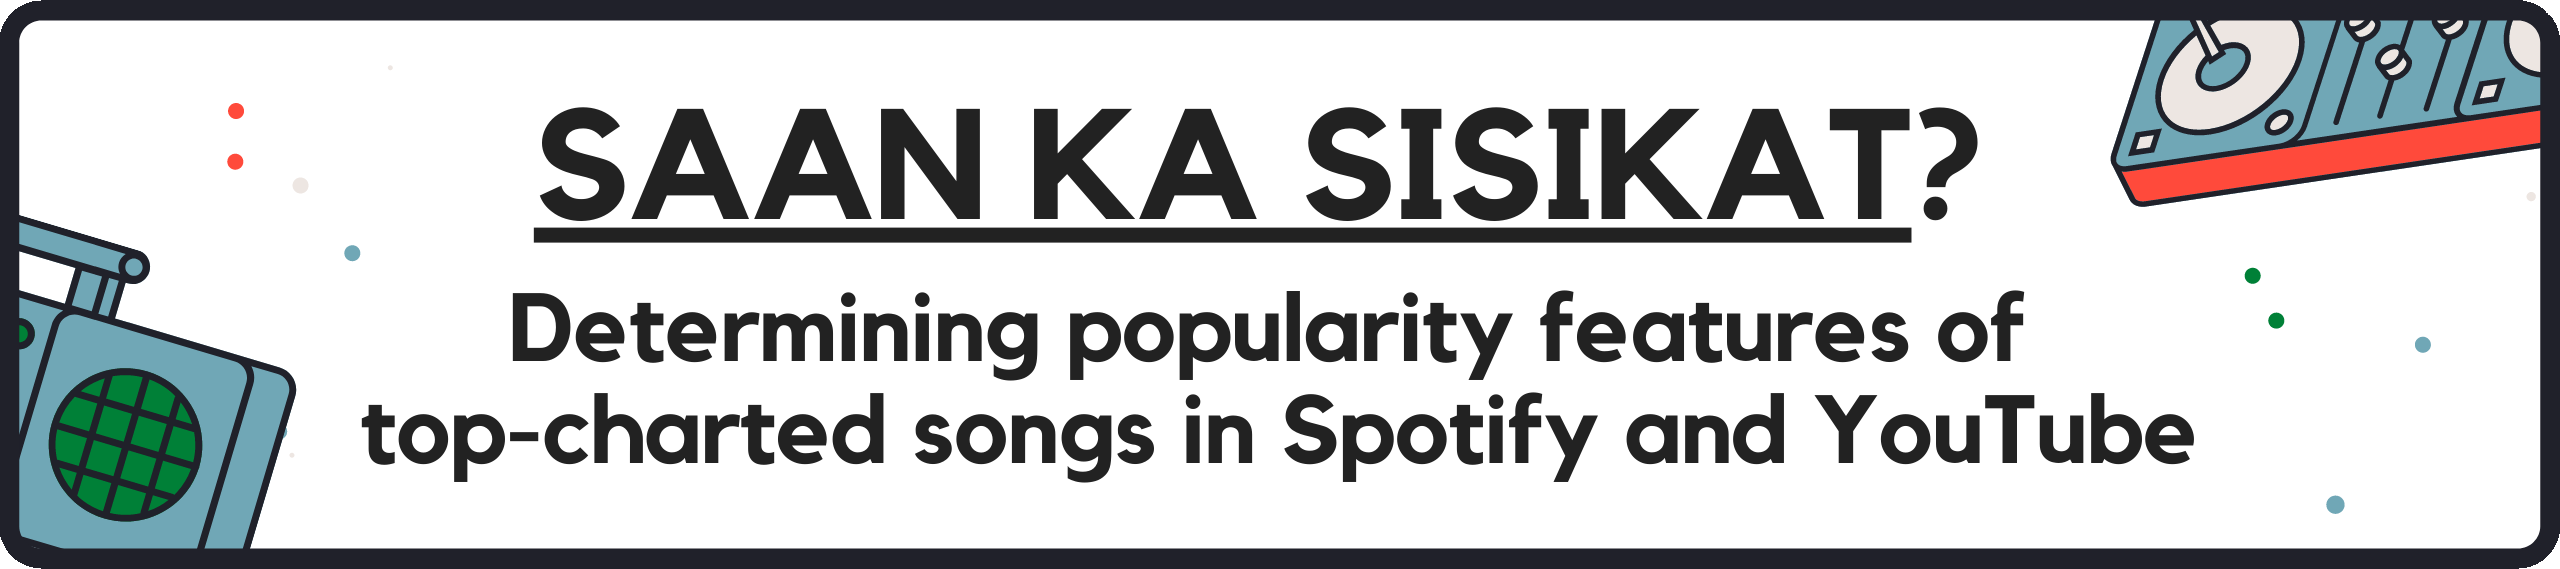

## Executive Summary

**Background** <br>
Music is big business. Streaming websites are the new marketplaces, serving as modern platforms to access an almost unlimited source of songs for listeners and revenue for artists and their labels. Understanding and predicting popularity of songs prior to and after their release proves to be very valuable as it can assist in providing targeted song/album marketing strategies. However, businesses and researchers have yet to find the optimal way to define *and* predict song and artist popularity. **This report aims to complement existing research by describing the popularity features of chart-topping songs in YouTube and Spotify.**

**Methods** <br>
In this report, we gathered the popularity features of the Top 100 songs in Youtube and Spotify, two of the biggest platforms worldwide, between July 23-29, 2021. We scraped their subdomain websites that feature each of their music rankings. We then used this information to extract song metadata from the YouTube and Spotify APIs and storing it in an SQLite 3 Database. We then performed an exploratory data analysis to examine associations and trends based on three aspects of popularity: **instantaneous**, which refers to a song's acoustic features; **dynamic**, which refers to the changing nature of a song’s popularity; and **social**, which includes aspects of the artists’ reputation and its social influence. 

**Results** <br>
In line with our research question, we discovered the following:

*Instantaneous*
- Acoustic features among top songs from YouTube and Spotify had the highest scores on danceability, energy, and valence, and lowest on speechiness and instrumentalness.
- Most acoustic features are common in both YouTube and Spotify’s top hits, except for explicit content which was present in about half.
- Microgenres (e.g. `Australian pop` and `Pop`, `European Rock` and `Rock`, among others) are increasingly becoming pervasive.

*Social*
- More featured artists do not translate to higher streams nor a higher popularity score.
- Having a popularity score of >90 may increase chances of being at the Top 20 charts.

*Dynamic*
- Top charted songs were produced by only four major labels, three of which were all based in the United States.
- In terms of markets served, the limits of Spotify are the start of where YouTube thrives. For example, Spotify was a latecomer in India and so YouTube is more popular.

**Conclusions** <br>
Our results suggest that the **popularity features of top-charting songs in both Spotify and YouTube have a lot in common**. Aided by a relative ranking that we designed to normalize and connect rankings of both platforms, **acoustic features alone do not appear to explain popularity**. **Traditional record labels still dominate the charts, but it is the platforms who enable their ability to reach hyper targeted markets (for example, through microgenres)**. Evaluation of these popularity features may be useful to replicate in narrower contexts, and can be used as preparatory work for other machine learning efforts in predicting popularity of songs in these two platforms.

## Introduction

The digital transformation in the music industry, marked by the rapid growth of music streaming services, paved the way for practically anyone to share their music and potentially gain popularity with or without a record label. 

In line with this, several businesses and researchers have attempted to conduct “hit song science” studies to predict if songs can be a hit prior to distribution ([Pachet, 2012](#pachetsony), [Pachet and Roy, 2008](#pachetroy)). Prior to the digital age, predicting a hit song was said to be done by record labels by gut-feeling but in recent years, this is now being done by using big data ([Hujran, Alikaj, Durrani & Al-Dmour, 2020](#hujran)). Despite being widely debated regarding its scientific validity, the existence of “hit song science” (HSS) - an approach under the larger field of music information retrieval (MIR) - has nevertheless continued to proliferate ([Pachet and Roy, 2008](pachetroy)). In this so-called hit song science, hit song prediction is done through the use of machine learning models based on a set of features which is similar to songs that already hit the charts ([Ni, Santos-Rodriguez, McVicar & Bie, 2011](#ni)).  

Currently, `popularity` of songs can be defined in many different ways. In this report, we define popularity in three aspects:
1. **Instantaneous** - instantaneous aspects of popularity refer to the features inherent to the song, such as its acoustic features. 
2. **Dynamic** - dynamic aspects of popularity refer to the changing nature of a song’s popularity. This includes its chart rankings, streams, and views.
3. **Social** - social aspects of popularity, such as the artists’ reputation and their social influence.

Several music streaming platforms allow for tracking and analysis of these factors ([Araujo, Cristo and Giusti, 2019](#araujo)), wherein we describe them further in the sections below.

### Overview

#### Spotify and YouTube
YouTube and Spotify are among the top of the global music streaming services. Both platforms provide tools for analytics for artists, researchers, developers and the general public. Their application programming interfaces (APIs) allow anyone to retrieve certain data that they can use to determine the popularity of songs or factors that might be contributing to the level of their popularity.

##### YouTube
YouTube, launched in 2005 initially to provide a venue for amateur videos to be shared, is now being used both by independent artists and traditional record companies to share their music. While mainly a video sharing platform, videos relating to music comprise the most of YouTube’s streams ([Liikkanen & Salovaara, 2015](#liikkanen)).

Google, who took over YouTube in 2006, launched YouTube Music only in 2018 to provide an application specific for music streaming. YouTube’s Music app is currently regarded as the world’s leading music app based on app downloads with over 5.2 million downloads from Google Play Store and nearly 1.5 million from Apple App Store as of July 2021 ([Statista, 2021](#statista)), although its main platform is still greatly used to stream music globally as the music app is available only in select countries.

YouTube provides access to its data to anyone. Artists have access to data regarding their levels of reach and engagement, profile of their audience and their revenue ([YouTube, 2021](#youtube3)). In the same way aspirants, researchers or developers also have access to data regarding the performance of songs, music videos or artists in general. Among these tools are the following:
- **YouTube Charts** shows the weekly hottest artists, songs and music videos around the world or within a region based on view count, which is a consolidation of views from the official music video, user generated content that uses the official song, and lyric videos ([YouTube, 2021](#youtube2)).
- **Youtube Data API** allows easy retrieval of dynamic metrics such as views, likes, and favorites among others ([YouTube, 2021](#youtube1)). 

Despite the availability of these data however, there is apparently limited research utilizing these. The study of Cayari ([2011](#cayari))  focused on how YouTube provided new ways to consume, create and share music only for a teenage musician who was then a relatively new and popular YouTube musician. A couple of recent studies provided evidence on the positive effect of user-generated contents close to the release dates of music on engagement ([Liikkanen & Salovaara, 2015](#liikanen), [Park, Park and Park, 2018](#park)).

##### Spotify
Unlike YouTube which was mainly a video sharing platform, Spotify in 2008 changed the music industry by providing a channel to easily stream songs based on personal interests using digital surveillance technology ([Dolata, 2020](#dolata)). Its success even furthered upon its acquisition in 2014 of Echo Nest - a leading analytics company at the time. A study in 2020 revealed that it even surpassed Amazon, Google, YouTube, and Apple in terms of the quality of its music metrics. Accordingly, it is now considered the world’s most popular audio streaming subscription service with 365M monthly active users and 165 million premium subscribers as of June 30, 2021 ([Spotify, 2021](#spotify)).

Apart from the dynamic features that YouTube also provides, Spotify provides data on instantaneous features such as energy, key, loudness, mode, speechiness, acousticness, liveness, valence and tempo among others. This is made accessible via the Spotify Web API. 

With the variety of data that Spotify provides, a lot of hit song prediction studies use Spotify data. Most of which utilized such instantaneous features in their modelling ([Al-Beitawi, Salehan, and Zhang, 2020](#albeitawi); [Georgieva, Suta & Burton, 2018](#georgieva); [Kim and Oh, 2021](#kim); [Nijkamp, 2018](#nijkamp); [Reiman & Ornell, 2018](#reiman)).

#### Determinants of song popularity
There have been many efforts to define the determinants of song popularity. Unfortunately, there are no overarching frameworks yet that dominate the literature. Here, we try to provide the major themes that academic researchers use in determining popularity.

##### Social 
Social media plays a role: the number of comments, whether positive or negative, was correlated with the high number of sales and ratings of artists ([Dhar and Chang, 2009](#dhar)). In fact, listeners assume that higher streams are better songs, which in turn lead to higher popularity of songs already popular ([Salganik, Dodds, and Watts, 2006](#salganik)). This is important, as most music streaming websites have trending charts placed at their homepage.

##### Dynamic (artist reputation)
Songs produced by larger and “powerful” record labels are associated with higher popularity ([Ren, Shen, and Kauffman, 2016](#ren)). This may be linked to higher chances of winning music awards and drive further sales and streaming numbers. Songs with featured artists may also contribute to high rankings ([Suh, 2019](#suh)). This is despite “home bias”, which is described as the preference towards national artists ([Way, Garcia-Gathright, and Cramer, 2020](#way)).

##### Instantaneous (acoustic features)
There is weak evidence that acoustic features may predict song hit probability. A cluster analysis on the Top 100 songs - mostly dominated by pop music - in Spotify for 2017 and 2018 reveals that songs with high danceability and low instrumentality have higher popularity scores ([Al-Beitawi, Salehan, and Zhang, 2020](albeitawi)). Especially for the Top 10 songs, it appears that popularity is linked to listeners’ motives “to change mood and emotion” ([Kim and Oh, 2021](#kim)).  

This, however, has not been true when extended across 1000 songs from 10 different genres ([Nijkamp, 2018](#nijkamp)). Araujo, Cristo, and Guisti ([2019](#araujo)) suggested that acoustic features may be irrelevant, after implementing a support vector machine classifier to predict song popularity two months in advance. Another study suggests adding a “superstar” variable, defined as an artist that appeared in the top charts between the previous year and in the past five years, may help to predict popularity ([Interiano et al., 2018](#interiano)).

### Significance
Predicting popularity has attracted both industry and academic interest, mostly because it provides a unique intersection of solving a business problem through machine learning techniques. If record labels and independent musicians are able to predict the popularity of the songs they release, they can provide targeted efforts towards song release and marketing. 

Where most literature has only attempted to use acoustic features from the Spotify API, this report complements existing studies by describing the instantaneous (i.e. acoustic features), dynamic (i.e. a song’s rankings, streams/views, among others), and social (i.e. artists' reputation and influence) aspects of popularity in **both** YouTube and Spotify charts.

### Research Questions
This report aims to answer our main research question: **What are the popularity features of chart-topping songs in YouTube and Spotify?**

Specifically, we want to answer:
1. What genres and artist names are included in the top charts of YouTube and Spotify? 
2. What are the shared acoustic features of global chart-topping songs in YouTube and Spotify? What is its relationship to the popularity score?
3. Among the chart-topping songs, what is the relationship of a song’s popularity score to its artist/s’ popularity score?
4. Among the chart-topping songs, what is the relationship of a song’s popularity score in Spotify to the number of views in YouTube?
5. Among the chart-topping songs on Youtube and Spotify Charts, which are consistently on the top? What features are common to these?

### Scope and Limitations
We evaluated a few limitations of this report, and have taken steps to minimize them wherever possible:
1. **Data limitations**. This study focuses only on instantaneous, dynamic, and social factors that can be supported by the data available only in the APIs of YouTube and Spotify. Thus, we will not be able to consider other factors considered in music psychology on why people prefer to listen certain songs over the others. 
2. **Time period covered.** Data gathered for this report only covered the last week of July 2021 in the interest of time. The authors exerted efforts to place the analysis in the proper context of the given time period. 
3. **Minor changes to our pre-specified research plan**. We have pre-specified our research plans in our submitted `game plan`. We have made minor changes to refine our questions and methodology, but refrained from making drastic changes to prevent confirmation or hindsight biases.

## Data
To answer our research questions, we needed access to data of platforms that are widely used by listeners worldwide. We used two of the dominant streaming platforms - YouTube and Spotify - because both of these platforms:
1. **Dominate the streaming landscape**, with users totalling millions per day.
2. **Make data on their chart-topping hits publicly available** through [YouTube Music Charts](https://charts.youtube.com/?hl=en-GB) and [Spotify Charts](https://spotifycharts.com/regional). These have become industry standards for evaluating popularity and virality of songs due to the information they collect and share, in competition with established platforms (e.g. Billboard) that only takes sales into account.
3. **Provide their data through API access**. Data gathered are either machine-generated or user-generated; aside from their charts being publicly available, song popularity based on the metrics they designed in-house. While computations are not revealed, they nevertheless make the results/scores available through each of their API. 

### YouTube dataset
For the purposes of this report, the data we used were initially gathered from YouTube Charts' [**Top Songs chart: The most played songs on YouTube**](https://charts.youtube.com/) which shows the top 100 most viewed songs per week, based on the consolidation of views from the official music video of the song, user generated content that uses the official song, and lyric videos of the song. This was downloaded directly from the website.
<br>
<br>
<center><left><b><font size=2> Table 1. Songs’ Data from the YouTube Charts website </font></b></left>
<br>
<font size=2><font color="gray">Details from the YouTube Charts website</font></font></center>

| Key | Value | Type |
|:---|:---|:---|
| Rank | Rank of a song on the current week | Integer |
| Previous Rank | Rank of a song on the previous week | Float |
| Track Name | Title of the song | String |
| Artist Names | Name/s of song artist/s | String |
| Weeks on Chart | Number of week/s the song has been on the chart | Integer |
| Views | Total number of views from the official music video of a song, user-generated content that uses the official song, and lyric videos of the song | Integer |
| Weekly Growth | Percentage increase in number of views | String |
| YouTube URL | Link to the official music video of the song | String |

<br>
From the data above, the video ID of each song was collected as necessary to retrieve data from the YouTube API. The following data on statistics and content details were gathered:
<br>
<br>
<center><left><b><font size=2> Table 2. Songs’ Original Music Video Data from the YouTube API </font></b></left>
<br>
<font size=2><font color="gray">Details from the YouTube API website</font></font></center>

| Key | Value | Type |
|:---|:---|:---|
| viewCount | Number of times a video has been viewed | Integer |
| likeCount | Number of times a video has been liked | Integer |
| dislikeCount | Number of times a video has been disliked | Integer |
| favoriteCount | Number of times a video has been favorited | Integer |
| commentCount | Number of comments for a video | Integer |
| channel ID | The YouTube channel ID where the video is published | String |
| duration | The length of the video in ISO 8601 duration format | String |
| caption | Indicates whether captions are available for the video | Boolean |
| definition | Indicates whether the video is available in high definition (hd) or only in standard definition (sd) | String |

### Spotify dataset
The Spotify API allows researchers and developers to access music samples, acoustic features, and other metadata of each song in their database. The following were accessed through their API, which returned a JSON file:
<br>
<br>
<center><left><b><font size=2> Table 3. Song information from the Spotify Charts website </font></b></left>
<br>
<font size=2><font color="gray">Details from the Spotify Charts website</font></font></center>

| Key | Value | Type |
|:---|:---|:---|
| spotify_rank | Rank for the week ending on the selected date. | Integer |
| title | Title of the song | String |
| artist | Artist/s of the song | String |
| spotify_streams | Number of streams | String |
| track_id | Track ID | String |

<br>

<center><left><b><font size=2> Table 4. Details of acoustic features as listed in Spotify's Web Documentation</font></b></left>
<br>
<font size=2><font color="gray">Details of acoustic features</font></font></center>

| Key | Value | Type |
|:---|:---|:---|
| acousticness | A measure of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. | Float |
| danceability | Danceability describes how suitable a track is for dancing. 0.0 is least danceable and 1.0 is most danceable. | Float |
| duration_ms | The duration of the track in milliseconds. | Integer |
| energy | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.  | Float |
| explicit | Whether or not the song has explicit content.  | Boolean |
| followers | The number of followers of the artist. | Integer |
| genre | The genre of the artist. | String |
| id (artist) | The Spotify ID for the artist. | String |
| id (song) | The Spotify ID for the track. | String |
| instrumentalness | Predicts whether a track contains no vocals. The closer the value is to 1.0, the greater likelihood the track has no vocal content. | Float |
| key | The key the track is in. | Integer |
| liveness | Detects the presence of an audience in the recording. Higher values represent an increased probability that the track was performed live.  | Float |
| loudness | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track.  | Float |
| mode | Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0. | Integer |
| popularity (artist) | The popularity score for the artist. | Integer |
| popularity (song) | The popularity score for the track. | Integer |
| speechiness | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like, the closer the value is to 1.0.	 | Float |
| tempo | The overall estimated tempo of a track in beats per minute (BPM).  | Float |
| time_signature | An estimated overall time signature of a track.  | Integer |
| type | The object type. | String |
| uri | The Spotify URI for the track. | String |
| valence | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative. | Float |

### Summary Statistics
Below, we describe the high-level view of each data we gathered. This forms part of our first step in examining the dataset.

#### Instantaneous

<center><left><b><font size=2> Table 5. Instantaneous features of Top 100 Songs </font></b></left>
<br>
<font size=2><font color="gray">Details from the Spotify API</font></font></center>

|  | mean | std | min | max |
|:---:|---|---|---|---|
| danceability | 0.680218341 | 0.14241515 | 0.345 | 0.961 |
| energy | 0.653266376 | 0.16762425 | 0.203 | 0.993 |
| key | 5.327510917 | 3.508408872 | 0 | 11 |
| loudness | -5.903004367 | 2.202784421 | -12.627 | -0.515 |
| speechiness | 0.098672489 | 0.086581129 | 0.0232 | 0.457 |
| acousticness | 0.270999449 | 0.244941742 | 2.55E-05 | 0.941 |
| instrumentalness | 0.00835284 | 0.059844526 | 0 | 0.633 |
| liveness | 0.1714869 | 0.133276705 | 0.0373 | 0.92 |
| valence | 0.551524891 | 0.234635765 | 0.065 | 0.964 |
| tempo | 118.7877598 | 27.24814546 | 71.105 | 180.917 |
| duration_ms | 202709.0873 | 49633.42003 | 58149 | 524507 |
| time_signature | 3.965065502 | 0.226728488 | 3 | 5 |
| explicit | 0.366812227 | 0.482990379 | 0 | 1 |

A total of 100 songs were gathered for data on instantaneous features of the songs. All of these were extracted from the Spotify API as discussed in the next sections. 

#### Dynamic

<center><left><b><font size=2> Table 6. Dynamic features of Top 100 Songs </font></b></left>
<br>
<font size=2><font color="gray">Details from the Spotify and YouTube Charts and APIs</font></font></center>

|  | mean | std | min | max |
|:---:|---|---|---|---|
| Spotify_Streams | 8303671.81 | 7346032.57 | 0 | 48633449 |
| popularity_song | 82.0349345 | 11.2409263 | 0 | 100 |
| YouTube Rank | 49.5394737 | 29.2075062 | 1 | 100 |
| Weeks on Chart | 9.94736842 | 8.75274393 | 1 | 49 |
| YouTube Views | 17552709.4 | 10129495.4 | 8451834 | 58608978 |
| views | 184442422 | 207450879 | 301586 | 1202643154 |
| likes | 2863415.22 | 4355109.7 | 7050 | 29952243 |
| dislikes | 128604.342 | 246920.592 | 220 | 1687071 |
| favorite | 0 | 0 | 0 | 0 |
| comments | 481955.84 | 2040331.52 | 32 | 15666491 |

A total of 100 rows were gathered for data on instantaneous features. All of these were extracted from the Spotify API . `Spotify_Streams` and `YouTube Views` refer to the raw, cumulative number each song gathered from either platforms. `Weeks on Chart`, `favorite`, and `comments` were not considered in the exploratory data analysis.

#### Social

<center><left><b><font size=2> Table 7. Social features of Top 100 Songs </font></b></left>
<br>
<font size=2><font color="gray">Details from the Spotify API</font></font></center>

|  | mean | std | min | max |
|:---:|---|---|---|---|
| popularity_artist | 84.6157205 | 14.3447807 | 0 | 100 |
| artist_followers | 12141322 | 16851702.2 | 946 | 83051538 |

Sources for the social aspects of popularity were gathered from the Spotify API, where a popularity score and the number of followers is available for each artist. Higher `popularity_artist` and `artist_followers` naturally command a bigger following and influence.

## Methodology
Our methodology is described in this section, which comprises of the following steps:

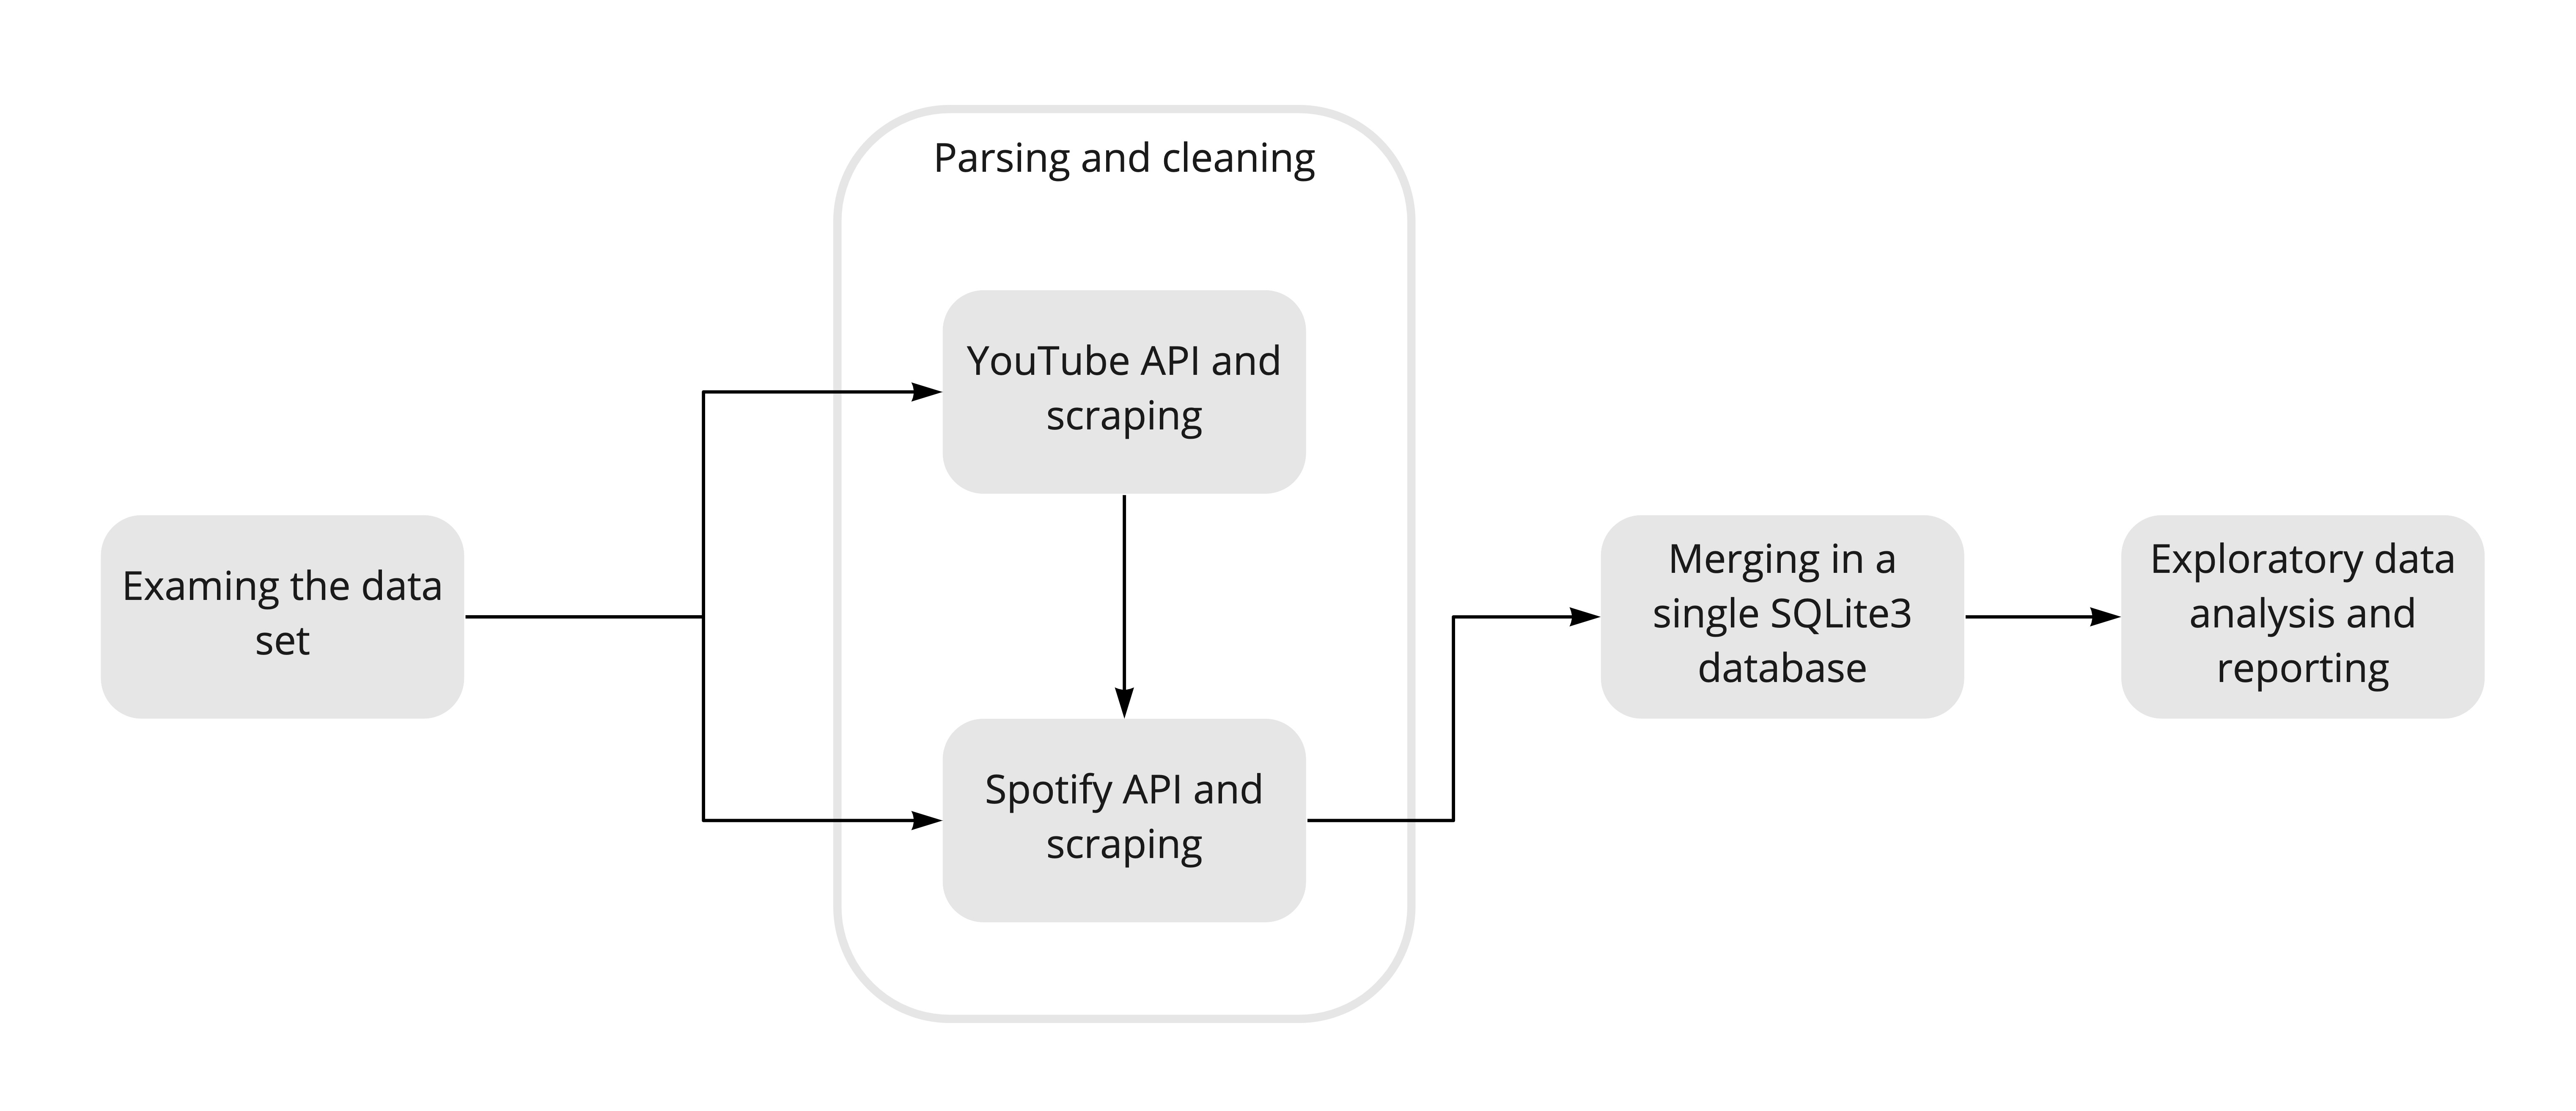
<center><left><b><font size=2> Figure 1. Process flow of this study </font></b></left>
<br>
<font size=2><font color="gray">Each step is discussed in the next few sections</font></font></center>

### Examining the dataset
In preparing for our analysis, we considered the datasets available and the necessary preparations needed to access their information. Specifically, we needed platforms that are able to provide their information through a public API; we also needed a website wherein we can scrape information from the website to support our analysis. This means that data obtained from the APIs themselves and the website should be relatable.

We decided to use Spotify and YouTube because of their well-written documentation and easily accessible APIs. Above this, however, we found that there existed a gap so compelling that it can help us contribute in examining the common features between two different (both in form and function) but widely-used platforms.

### Parsing and cleaning

#### Youtube

The data on global top 100 songs from July 23 to 29, 2021 was downloaded as a CSV file directly from YouTube’s Music Charts & Insights Top Songs web page. This contains current and previous rank, rank name, artists names, weeks on chart, views, weekly growth and YouTube URL. The CSV file was read and transformed into a DataFrame using the Python Pandas module. 

In [6]:
# Extract video URLs from YouTube Top 100 charts
# extract video URLs from YouTube Top 100 charts
with open('filepath.txt') as file:
    path = file.read()
    path += 'youtube-charts-top-songs-global-weekly-2021-07-29.csv'

youtube_df = pd.read_csv(path)
youtube_df['video_id'] = (youtube_df['YouTube URL'].str.extract(r'.*v=(.*)',
                                                                expand=False))
video_id_list = youtube_df['video_id'].to_list()

A list of YouTube video IDs from the Youtube URL was then generated and used as input parameters when getting data from YouTube’s API Videos resource.  The following input parameters were parsed to extract data from the API using the Requests module of Python. 
1. The HTTP request endpoint used was https://www.googleapis.com/youtube/v3/videos.
2. The parameters passed were part, id, and key. 
3. For the part parameter,  the following parameter values were used:

    a. *contentDetails* to extract the channel ID, presence of caption and definition type;<br>
    b. *snippet* to extract the title; and<br>
    c. *statistics* to extract the counts of views, likes, dislikes, favorites and comments.

In [7]:
# Get the channelID, title, duration, presence of a caption,
# definition (whether it's HD), number of views, number of likes, dislikes,
# favorites, and comments for all the Top 100 videos during
# the fourth week of July

channelID_list, title_list, duration_list = [], [], []
caption_list, definition_list, views_list = [], [], []
likes_list, dislikes_list, favorite_list, comments_list = [], [], [], []

i = 0
while i < (len(video_id_list)):
    ids = str(video_id_list[i] + ',' + video_id_list[i+1] + ',' +
              video_id_list[i+2] + ',' + video_id_list[i+3])
    yt = requests.get(
        'https://www.googleapis.com/youtube/v3/videos',
        params={
            'key':api_key,
            'part':'snippet,contentDetails,statistics',
            'id': ids,
        }
    ).json()
    for j in range(0, 4):
        channelID_list.append(yt['items'][j]['snippet']['channelId'])
        title_list.append(yt['items'][j]['snippet']['title'])
        duration_list.append(yt['items'][j]['contentDetails']['duration'])
        caption_list.append(yt['items'][j]['contentDetails']['caption'])
        definition_list.append(yt['items'][j]['contentDetails']['definition'])
        views_list.append(int(yt['items'][j]['statistics']['viewCount']))
        likes_list.append(int(yt['items'][j]['statistics']['likeCount']))
        dislikes_list.append(int(yt['items'][j]['statistics']['dislikeCount']))
        favorite_list.append(
            (int(yt['items'][j]['statistics']['favoriteCount'])))
        try:
            comments_list.append(
                (int(yt['items'][j]['statistics']['commentCount'])))
        except KeyError:
            comments_list.append(np.nan)
    i += 4

After parsing, we received the Response object with a JSON file type and transformed it into a Python Pandas DataFrame. 

In [8]:
# Construct dataframe for the extracted data
col_names = ['channelID', 'title', 'duration', 'caption',
             'definition', 'views', 'likes', 'dislikes',
             'favorite', 'comments']
values = [channelID_list, title_list, duration_list,
          caption_list, definition_list, views_list,
          likes_list, dislikes_list, favorite_list, comments_list]

top100_songs = pd.DataFrame({k: v for k, v in zip(col_names, values)})

This second DataFrame was merged with the DataFrame on the Top 100, to generate the consolidated YouTube DataFrame.

In [9]:
new_df = pd.merge(youtube_df, top100_songs.drop('title', axis=1),
                  left_index=True, right_index=True)
new_df = new_df.rename(columns={'Track Name': 'Title',
                                'Artist Names': 'Artist',
                                'Rank': 'YouTube Rank',
                                'Views':'YouTube Views'})

Afterwards, this was saved into a SQLite3 database.

In [10]:
conn = sqlite3.connect("musicbugs.db", uri=True)
new_df.to_sql(name='youtube', con=conn, index=False,
              if_exists='replace')

#### Spotify

Weekly data - covering July 23 to 29, 2021 - of the first 100 songs from the Global Top 200 was scraped from the [Spotify Charts website](https://spotifycharts.com/) using Python `requests`. It contained rankings, songs, artists, and the number of streams. 

In [11]:
# Send request to scrape data from spotifycharts.com
charts = requests.get('https://spotifycharts.com/regional/global/weekly/'
                      '2021-07-23--2021-07-30',
                      headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; '
                               'Win64; x64) AppleWebKit/537.36 '
                               '(KHTML, like Gecko) Chrome/42.0.2311.135 '
                               'Safari/537.36 Edge/12.246'})
soup = BeautifulSoup(charts.text)

# Scrape the title, song artist, the number of streams, and the track link
# of each song in the Top 200 of Spotify
title_li = []
artist_li = []
streams_li = []
link_li = []

topcharts = soup.find_all('td', class_='chart-table-track')
for top in topcharts:
    title = top.find('strong').text
    artist = top.find('span').text
    streams = top.findNext('td').text
    link = (top.findPrevious('a',
                             {'href':re.compile(r'https://open.*')})['href'])
    title_li.append(title)
    artist_li.append(artist)
    streams_li.append(streams)
    link_li.append(link)
tuple_data = list(zip(title_li, artist_li, streams_li, link_li))

# Construct dataframe for the scraped data
df_topscrape = pd.DataFrame(tuple_data, columns=['Title', 'Artist',
                                                 'Spotify_Streams', 'link'])
df_topscrape['Spotify_Rank'] = df_topscrape.index+1
df_topscrape['Artist'] = df_topscrape['Artist'].str.replace("by", "")
df_topscrape['link'] = df_topscrape['link'].str.replace(
    "https://open.spotify.com/track/", "")
df_topscrape = df_topscrape[['Spotify_Rank', 'Title', 'Artist',
                             'Spotify_Streams', 'link']]
df_topscrape = df_topscrape.rename(columns={'link':'track_id'})

We then use Spotify's API to access song metadata. 

While Spotify makes the data readily available from a downloadable CSV file, we did not opt to use this as it did not include URLs to each of the artists, which we later use as key to access metadata. Crucial to this step is accessing the `track_id` which enables us to link the scraped data with the information from the Spotify API.

In [12]:
# Get authorization token using POST
AUTH_URL = 'https://accounts.spotify.com/api/token'

auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
}).json()

# Save the access token
access_token = auth_response['access_token']

headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

Afterwards, metadata for each of the charted songs and artists were collected from the Spotify API. This endpoint allows us to query available information through HTTPS requests made through the Python `requests` library; it then returns the JSON metadata from the Spotify Data Catalogue. 

In [13]:
# Get the list of all track IDs of songs in the Top 100
songs = df_topscrape['track_id'].to_list()

# From Spotify API endpoint, get audio features of each track_id in json
BASE_URL = 'https://api.spotify.com/v1/'

dct = {}
for track_id in songs:
    r = requests.get(BASE_URL + 'audio-features/' + track_id, headers=headers)
    d = r.json()
    dct[track_id] = d

df_audio = pd.DataFrame.from_dict(dct).T
df_audio = df_audio.reset_index()
df_audio = df_audio[['id', 'danceability', 'energy', 'key', 'loudness',
                    'mode', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo',
                    'type', 'duration_ms', 'time_signature']]

# From Spotify API endpoint, get avail mkt, genre, release date in json
BASE_URL = 'https://api.spotify.com/v1/'

dct2 = {}
for track_id in songs:
    r = requests.get(BASE_URL + 'tracks/' + track_id, headers=headers)
    d = r.json()
    dct2[track_id] = d

artist_id = []
for i in dct2:
    artist_id.append(dct2[i]['album']['artists'][0]['id'])

# Construct dataframe from extracted data
df_tracks = pd.DataFrame.from_dict(dct2).T
df_tracks['artist_id'] = artist_id
df_tracks = df_tracks.reset_index()
df_tracks = df_tracks[['artist_id', 'available_markets', 'duration_ms',
                       'explicit', 'id', 'is_local', 'name', 'popularity']]

# From Spotify API endpoint, get genre and artist popularity in json
BASE_URL = 'https://api.spotify.com/v1/artists/'

dct3 = {}
for artist_id in artist_id:
    r = requests.get(BASE_URL + artist_id, headers=headers)
    d = r.json()
    dct3[artist_id] = d

df_artist = pd.DataFrame.from_dict(dct3).T
df_artist = df_artist.reset_index()

# Create new column to extract no of followers per artist in nested json
followers = []
for i in df_artist['followers'].to_list():
    followers.append(i['total'])
df_artist['artist_followers'] = followers
df_artist = df_artist[['name', 'id', 'genres', 'popularity',
                       'artist_followers']]

At this point, we are able to merge the Spotify Charts data and the Spotify API data.

In [14]:
# Merge the audio features, tracks, and Spotify charts dataframes
df_scrape_audio = pd.merge(df_topscrape, df_audio,
                           left_on='track_id', right_on='id')
df_tracks_artist = pd.merge(df_tracks, df_artist,
                            left_on='artist_id', right_on='id')

# Clean the merged data's column names
newcolnames = {'id_x':'track_id', 'name_x':'Title',
               'popularity_x':'popularity_song',' name_y':'Artist'}
df_tracks_artist = df_tracks_artist.rename(columns=newcolnames)

# Merge the two dfs (scrape+audio) and (tracks+artist)
df_spotify = pd.merge(df_scrape_audio, df_tracks_artist, left_on='track_id',
                      right_on='track_id')

df_spotify = df_spotify[['Spotify_Rank', 'Title_x', 'Artist',
                         'Spotify_Streams', 'danceability', 'energy', 'key',
                         'loudness', 'mode', 'speechiness', 'acousticness',
                         'instrumentalness', 'liveness', 'valence', 'tempo',
                         'type', 'duration_ms_x', 'time_signature',
                         'explicit', 'is_local', 'popularity_song',
                         'genres', 'popularity_y', 'artist_followers',
                         'track_id', 'artist_id']]
newcolnames = {'Title_x':'Title',
               'duration_ms_x':'duration_ms','popularity_y':
               'popularity_artist'}
df_spotify = df_spotify.rename(columns=newcolnames)

# Flatten the genres list to be able to store in db
df_spotify['genres'] = [','.join(i) if isinstance(i, list)
                        else i for i in df_spotify['genres']]

# Convert 'instrumentalness' to float so sql wont convert it to text
df_spotify['instrumentalness'] = (df_spotify['instrumentalness']
                                       .astype(float))

Afterwards, it was saved to an SQLite3 database.

In [15]:
# Add as a table in sqlite3 database
df_spotify.to_sql('spotify', conn, if_exists='replace')

#### Songs with no metadata 

Because Spotify is our main source of data for dynamic features, its Top 100 songs naturally has the complete features accessed through its API.

However, because YouTube has a different list of top songs, some of the songs are not within the extracted Top 100 songs from Spotify.

To solve this, we use the Spotify API to extract information for YouTube videos that had no metadata. We essentially repeated the Spotify API process to access information for YouTube videos.

In [16]:
# Extract track_id from the urls using regex
with open('filepath.txt') as file:
    path = file.read()
    path += 'ytspot_urls.txt'
    
newsongs = pd.read_csv(path, header=0)
newsongs = newsongs['URLs'].str.extract(re.compile(
    r'//open.spotify.com/track/(.+)\?si'))
newsongs = newsongs[0].to_list()

# From Spotify API endpoint, extract audiofeatures from json file
BASE_URL = 'https://api.spotify.com/v1/'

dct = {}
for track_id in newsongs:
    r = requests.get(BASE_URL + 'audio-features/' + track_id, headers=headers)
    d = r.json()
    dct[track_id] = d

# Convert audiofeatures to df
df2_audio = pd.DataFrame.from_dict(dct).T
df2_audio = df2_audio.reset_index()
df2_audio = df2_audio[['id', 'danceability', 'energy', 'key', 'loudness',
                       'mode', 'speechiness', 'acousticness',
                       'instrumentalness', 'liveness', 'valence', 'tempo',
                       'type', 'duration_ms', 'time_signature']]

# From Spotify API endpoint, extract tracks info from json file
BASE_URL = 'https://api.spotify.com/v1/'
dct2 = {}
for track_id in newsongs:
    r = requests.get(BASE_URL + 'tracks/' + track_id, headers=headers)
    d = r.json()
    dct2[track_id] = d

# Extract artist_id and artist_name from nested json file
artist_id = []
for i in dct2:
    artist_id.append(dct2[i]['album']['artists'][0]['id'])

artist_name = []
for i in dct2:
    artist_name.append(dct2[i]['album']['artists'][0]['name'])

# Save track info
df2_tracks = pd.DataFrame.from_dict(dct2).T
df2_tracks['artist_id'] = artist_id
df2_tracks['Artist'] = artist_name
df2_tracks = df2_tracks.reset_index()
df2_tracks = df2_tracks[['name', 'Artist', 'artist_id', 'available_markets',
                         'duration_ms', 'explicit', 'id', 'is_local',
                         'popularity']]

# From Spotify API endpoint, extract genre, popularity
BASE_URL = 'https://api.spotify.com/v1/artists/'

dct3 = {}
for artist_id in artist_id:
    r = requests.get(BASE_URL + artist_id, headers=headers)
    d = r.json()
    dct3[artist_id] = d

# Convert artist info to dataframe
df2_artist = pd.DataFrame.from_dict(dct3).T
df2_artist = df2_artist.reset_index()

# Extract no of followers from nested json
followers = []
for i in df2_artist['followers'].to_list():
    followers.append(i['total'])
df2_artist['artist_followers'] = followers
df2_artist = df2_artist[['name', 'id', 'genres', 'popularity',
                         'artist_followers']]

# Merge track info and artist info
df2_tracks_artist = pd.merge(df2_tracks, df2_artist, left_on='artist_id',
                             right_on='id')
newcolnames = {'id_x':'track_id','name_x':'Title',
               'popularity_y':'popularity_artist',
               'popularity_x':'popularity_song'}
df2_tracks_artist = df2_tracks_artist.rename(columns=newcolnames)

# Merge (track+artist) and audio df
df2_spotify = pd.merge(df2_audio, df2_tracks_artist, left_on='id',
                       right_on='track_id')
df2_spotify = df2_spotify[['Title', 'Artist', 'danceability', 'energy', 'key',
                           'loudness', 'mode', 'speechiness', 'acousticness',
                           'instrumentalness', 'liveness', 'valence', 'tempo',
                           'type', 'duration_ms_x', 'time_signature',
                           'explicit', 'is_local', 'popularity_song',
                           'genres', 'popularity_artist', 'artist_followers',
                           'track_id', 'artist_id']]
df2_spotify = df2_spotify.rename(columns={'duration_ms_x':'duration_ms'})

# Convert genre to list so sqlite3 will accept the df
df2_spotify['genres'] = [','.join(i) if isinstance(i, list)
                         else i for i in df2_spotify['genres']]

# Convert to float so sqlite will not treat it as text
df2_spotify['instrumentalness'] = (df2_spotify['instrumentalness']
                                       .astype(float))

We then add a table to the existing database.

In [17]:
# Add as a table in sqlite3 database
df2_spotify.to_sql('spotify_below', conn, if_exists='replace')

Below, we list down specific challenges we encountered during cleaning:
<br>
<br>
<center><left><b><font size=2> Table 8. Challenges encountered and solutions implemented </font></b></left>
<br>
<font size=2><font color="gray">Details of each challenge during data cleaning</font></font></center>

| Site | Challenge | Solution |
|:---:|:---|:---|
| Spotify | Search - where YouTube limits the number of calls one can make per day, Spotify only makes use of a time delay feature if too many requests are made.  | In anticipation of the limits, we ensured that we do not exceed the limits set by Spotify for API requests.  |
| YouTube | Song names - because YouTube is traditionally a video website where anyone can upload, there exists no standard for writing song and artist/s names from video titles.  | We used the track name from the first DataFrame derived from Music Charts & Insights Top Songs. |
| YouTube | Song genre - this was not specified. | Genres of the songs were instead taken from the main artists’ profile but 3 profiles lacked this data. |
| YouTube | Cumulative views for songs - this number differed across the website. | We have taken this into account during the exploratory data analysis. |
| YouTube | Different language - some videos that charted in YouTube are not in Spotify because of different languages. | We removed songs with languages that are not in English/Roman alphabet. |
| Spotify YouTube | Multiple artists - some songs have multiple artists.  | Artist popularity score is only based on the first artist, which we assume as the leading artist. |

### Merging in a single SQLite3 database

The combined tables were also saved in an SQlite3 database. These tables were used for the EDA.

In [18]:
# Merge dataframes (spotify and youtube)
merge1 = pd.merge(df_spotify, new_df.drop('Artist', axis=1),
                  how='inner', on='Title')
merged_below = pd.merge(df2_spotify, new_df.drop('Artist', axis=1),
                        how='inner', on='Title')

# Generate youtube_77 table
merged = pd.concat([merge1, merged_below]).drop_duplicates('Title',
                                                           keep='first')

# Convert `instrumentalness` to float so sqlite will not treat it as text
merged['instrumentalness'] = (merged['instrumentalness']
                                       .astype(float))

# Generate spotify 200 table
df_yt77 = merged[['Title', 'YouTube Rank', 'Previous Rank', 'Weeks on Chart',
                  'YouTube Views', 'Weekly Growth', 'YouTube URL',
                  'channelID', 'duration', 'caption', 'definition', 'views',
                  'likes', 'dislikes', 'favorite', 'comments']]
merge_spotify_yt = pd.merge(df_spotify, df_yt77, how='left',
                            on='Title').drop_duplicates('Title', keep='first')

# Convert `instrumentalness` to float so sqlite will not treat it as text
merge_spotify_yt['instrumentalness'] = (merge_spotify_yt['instrumentalness']
                                       .astype(float))

# Generate final all_data - spotify 200 table with labels of interest
list_to_filter = ['Spotify_Rank', 'Title', 'Artist', 'Spotify_Streams',
                  'danceability', 'energy', 'key', 'loudness', 'mode',
                  'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'type', 'duration_ms',
                  'time_signature', 'explicit', 'is_local',
                  'popularity_song', 'genres', 'popularity_artist',
                  'artist_followers', 'track_id', 'artist_id',
                  'YouTube Rank', 'Previous Rank', 'Weeks on Chart',
                  'YouTube Views', 'Weekly Growth', 'YouTube URL',
                  'channelID', 'duration', 'caption', 'definition', 'views',
                  'likes', 'dislikes', 'favorite', 'comments']
df_spotify200 = merge_spotify_yt[list_to_filter]

# Generate final youtube_77 table with labels of interest
df_yt77 = merged[['Spotify_Rank', 'Title', 'Artist', 'Spotify_Streams',
                  'danceability', 'energy', 'key', 'loudness', 'mode',
                  'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'type', 'duration_ms',
                  'time_signature', 'explicit', 'is_local',
                  'popularity_song', 'genres', 'popularity_artist',
                  'artist_followers', 'track_id', 'artist_id',
                  'YouTube Rank', 'Previous Rank', 'Weeks on Chart',
                  'YouTube Views', 'Weekly Growth', 'YouTube URL',
                  'channelID', 'duration', 'caption', 'definition', 'views',
                  'likes', 'dislikes', 'favorite', 'comments']]

# Generate consolidated table containing Spotify and Youtube top hits
conso_spotytube = pd.concat([df_spotify200,
                             df_yt77]).drop_duplicates('Title', keep='first')

# Convert `instrumentalness` to float so sqlite will not treated it as text
conso_spotytube['instrumentalness'] = (conso_spotytube['instrumentalness']
                                       .astype(float))

We then added a table to the existing database.

In [19]:
# SQL > add merged dataframe - youtube_77 as a table in the database
merged.to_sql('youtube_77', conn, if_exists='replace')

# SQL > add merged dataframe - spotify_200 as a table in the database
merge_spotify_yt.to_sql('spotify_200', conn, if_exists='replace')

# SQL > add merged dataframe - all_data as a table in the database
conso_spotytube.to_sql('all_data', conn, if_exists='replace')

We encountered the following challenges and provided the solutions to each:
<br>
<br>
<center><left><b><font size=2> Table 9. Challenges encountered and solutions implemented </font></b></left>
<br>
<font size=2><font color="gray">Details of each challenge during merging</font></font></center>

| Challenge | Solution |
|:---|:---|
| Different languages - some videos that charted in YouTube are not in Spotify because of different languages. | We removed songs with languages that are not in English/Roman alphabet. |
| Lack of song metadata - items present in YouTube but not in Spotify did not have song metadata | We used Spotify to fetch data for YouTube-charted songs that did not have metadata |
| Mismatch in top songs - some items were present in Spotify and not in YouTube, and vice versa. | YouTube doesn’t have a list of ranks and views beyond the top100 songs. We retained the songs but considered the YouTube data as null. |
| Some numbers were stored as text when converting to SQL database. Moreover, the genre was stored as list upon parsing. | We converted `instrumentalness` into float before merging and flattened the genre to change the type to a string.|

### Generation of relative rank

To find which songs truly rank high, we took the relative rank of the chart-topping songs. We multiplied the Spotify and YouTube rankings to get the relative weight of each item. We then sorted the weights in ascending order and reset the index to see the new rankings.

In [20]:
# Read all_data from sql
df_all = pd.read_sql('SELECT * FROM all_data', conn)
df_rank = df_all[['Spotify_Rank', 'YouTube Rank', 'Title', 'Artist',
                  'Spotify_Streams', 'danceability', 'energy', 'key',
                  'loudness', 'mode', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence', 'tempo',
                  'type', 'duration_ms', 'time_signature', 'explicit',
                  'is_local', 'popularity_song', 'genres',
                  'popularity_artist', 'artist_followers',
                  'track_id', 'artist_id', 'Previous Rank', 'Weeks on Chart',
                  'YouTube Views', 'Weekly Growth', 'YouTube URL',
                  'channelID', 'duration', 'caption', 'definition', 'views',
                  'likes', 'dislikes', 'favorite', 'comments']]

# Replace below top 200 rank to 201
df_rank['Spotify_Rank'] = (df_rank['Spotify_Rank']
                           .replace({'Below Top 200' : 201}))
df_rank = df_rank.fillna(201)

# Compute the relative rank
df_rank['Weight'] = (df_rank['Spotify_Rank'].astype(int) * 
                     df_rank['YouTube Rank'].astype(int))
df_rank = df_rank.sort_values(by='Weight', ascending=True)
df_rank = df_rank.reset_index().reset_index()
df_rank = df_rank.drop('index', axis=1)
df_rank = df_rank.rename(columns={'level_0' : 'Relative Rank'})
df_rank['Relative Rank'] = df_rank['Relative Rank'] + 1

# Convert `instrumentalness` to float so sql will not treat it as text
df_rank['instrumentalness'] = (df_rank['instrumentalness']
                                       .astype(float))

This table was then added to the database.

In [21]:
# Add all_data with rank as a table in the database
df_rank.to_sql('alldata_rank', conn, if_exists='replace')

### Exploring the data set and harnessing insights
In exploring the merged dataset, we ran the information through different graphs in order to explore and gather insights that will be able to answer our research questions and find trends or associations. We initially made explorations of Spotify and YouTube data separately; this was made so we are able to understand the rate of listening or viewing behavior at each platform. 

The next section lists our findings and observations from the merged dataset.

In [22]:
with sqlite3.connect('musicbugs.db') as conn:
    df_yt = pd.read_sql("""
        SELECT *
        FROM youtube_77
    """, conn)
    df_s = pd.read_sql("""
        SELECT *
        FROM spotify
    """, conn)
    df_all = pd.read_sql("""
        SELECT *
        FROM all_data
    """, conn)
    df_rank = pd.read_sql('SELECT * FROM alldata_rank', conn)

df_yt.drop('index', axis=1, inplace=True)
df_s.drop('index', axis=1, inplace=True)

## Exploratory Data Analysis and Discussion
The following analyses attempt to answer our main research questions. We focused on the Top 100 songs available in each of their charts which were publicly available through a subdomain. As we answered each question and wrangled with the available dataset, we visualized and reported here the interesting results and patterns we observed over the given period.

### What genres and artist names are included in the top charts of YouTube and Spotify? 
We performed a high-level overview of the Top 100 chart and presented the top 10 artists with the most songs in each platform. 

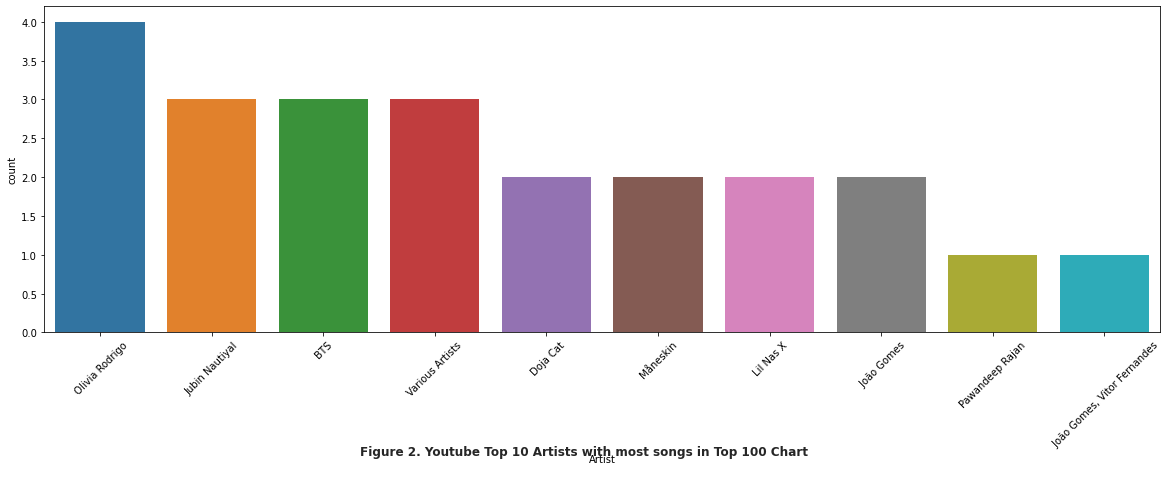

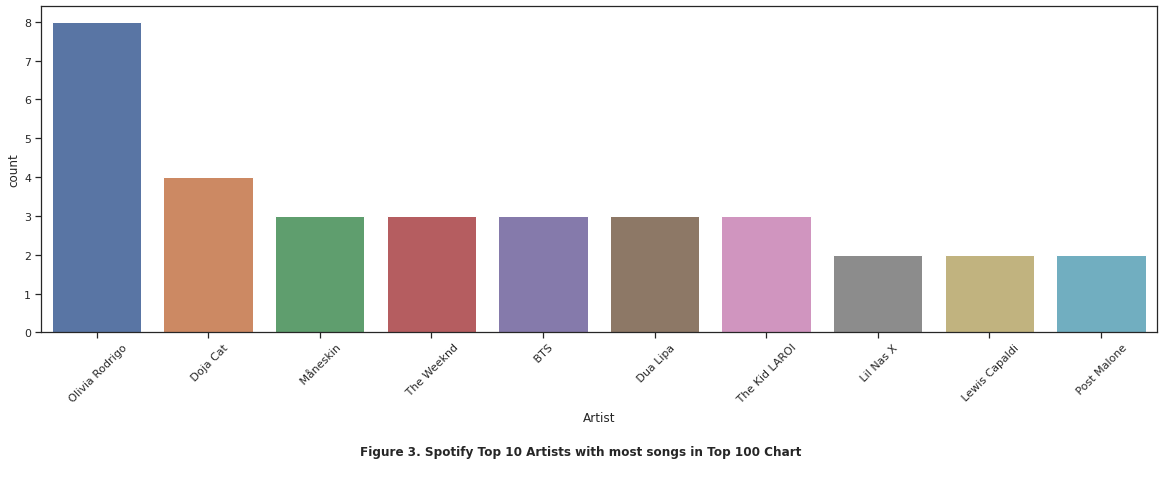

In [23]:
# #####################
# Figure 5.1.A. YouTube
# #####################

plt.figure(figsize=(20, 6))

df_yt[['YouTube Rank', 'Title', 'Artist']].sort_values(by='YouTube Rank')
df_yt.drop_duplicates(subset='Title', inplace=True)
df_yt[df_yt['Title'] == "Loco"]
for i, title in enumerate(df_yt.Title.unique()):
    if len(df_yt[df_yt['Title'] == title]) > 1:
        print(title)
df_artist_count_yt = (df_yt.Artist.value_counts()
                      .reset_index()
                      .rename({'index': 'Artist', 'Artist': 'count'}, axis=1))

sns.barplot(x='Artist', y='count', data=df_artist_count_yt[:10])
sns.set_theme(style="ticks")

plt.suptitle('Figure 2. Youtube Top 10 Artists with '
             'most songs in Top 100 Chart\n',
             size=12, ha='center', va='bottom', y=-0.2, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

# #####################
# Figure 5.1.B. Spotify
# #####################

plt.figure(figsize=(20, 6))

df_s = df_s[:100]
df_s[df_s.genres.isna()]['genres']
to_drop_indices = df_s[df_s.genres.isna()]['genres'].index.to_list()
df_genres = df_s.head(100).drop(to_drop_indices, axis=0)
df_s_100 = df_s.head(100)
df_s_100.groupby('Artist')['Title'].count().sort_values(ascending=False)
df_artist_count_s = df_s_100.Artist.value_counts().reset_index()
df_artist_count_s.rename({'Artist': 'count', 'index': 'Artist'},
                       axis=1,
                       inplace=True)

sns.barplot(x='Artist', y='count', data=df_artist_count_s[:10])
sns.set_theme(style="ticks")

plt.suptitle('Figure 3. Spotify Top 10 Artists with most songs'
             ' in Top 100 Chart\n', size=12, ha='center',
             va='bottom', y=-0.2, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

Both Figures 2 and 3 show that Olivia Rodrigo, a Filipino-American musician, ranked as the artist with the most number of songs in both Spotify and YouTube. Rodrigo has recently released her album *Sour* last May 21, 2021, receiving critical acclaim backed by a well-funded record label, Geffen Records, under Universal Music.

Overall, the Top 10 songs were produced by just four music labels, three of which were the three biggest in the music industry - Sony, Warner Music, and Universal Music. All are also based in the United States. Only one song, Volvi by Aventura and Bad Bunny, was produced by a South American record label, Rimas.

Interestingly, it is only on YouTube where we observed Indian artists in the Top 10. Spotify was a latecomer into the Indian market, having launched its service only in 2019. Google, through its parent company Alphabet, has made several initiatives to tap the market; in fact, it will invest USD 10 billion for the next few years.

Since the genres were taken from the main artists’ profile, about 80% of the songs were tagged with more than one genre. Despite that, a study showed that might be the case because of the existence of a complex genre association ([Silver, Lee & Childress, 2016](#silver)).  After classifying the genres of these songs into more general categories, results show that although a bit higher in Spotify, pop songs dominated the charts in both platforms as illustrated in Figure 4.

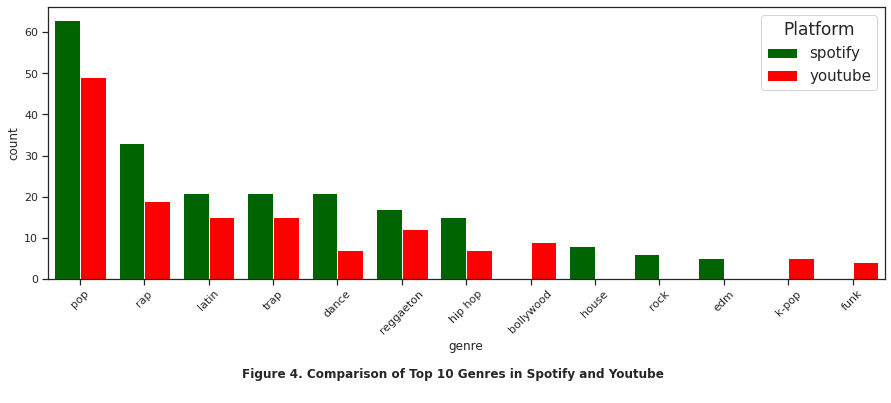

In [24]:
# generate dataframe with generes

df_s_g = df_s[:100]
df_s_g[df_s_g.genres.isna()]['genres']
to_drop_indices = df_s_g[df_s_g.genres.isna()]['genres'].index.to_list()
df_genres = df_s_g.head(100).drop(to_drop_indices, axis=0)


def genres(x):
    new = []
    for elem in x.split(','):
        new.append('-'.join(elem.split()))
    return new


all_genres = []
for elem in df_genres.genres.apply(genres):
    for genre in elem:
        all_genres.append(genre)
genre_categories = ['pop', 'rap', 'rock', 'hip hop', 'edm', 'comic', 'house',
                    'country', 'reggaeton', 'latin', 'trap', 'indie',
                    'aussietronica', 'techno', 'dance', 'wave', 'brostep',
                    'soul', 'forro', 'sertanejo', 'talent show', 'alt-z',
                    'grunge', 'francoton', 'r&b', 'trance',
                    'irish singer songwriter', 'contemporary', 'punk',
                    'plugg', 'dreamo', 'k-pop', 'afrofuturism', 'mellow gold',
                    'big room', 'drill']
df_genre_count = pd.DataFrame(columns=['genre', 'count'])
for genre in genre_categories:
    count = df_genres[df_genres['genres'].str.contains(genre)].shape[0]
    df_genre_count = (df_genre_count
                      .append({'genre': genre, 'count': count},
                              ignore_index=True))
top_genre_count = df_genre_count.sort_values(by='count',
                                             ascending=False).head(10)


df_yt.drop_duplicates(subset='Title', inplace=True)
to_drop_yt94 = df_yt[df_yt.genres.isna()][['genres']].index.to_list()
df_yt.drop(to_drop_yt94, axis=0, inplace=True)

for elem in df_yt.genres.apply(genres):
    for genre in elem:
        all_genres.append(genre)

genre_categories = ['pop', 'rap', 'rock', 'hip hop', 'edm', 'comic', 'house',
                    'country', 'reggaeton', 'latin', 'trap', 'indie',
                    'aussietronica', 'techno', 'dance', 'wave', 'brostep',
                    'soul', 'forro', 'sertanejo', 'talent show', 'alt-z',
                    'grunge', 'francoton', 'r&b', 'trance',
                    'irish singer songwriter', 'contemporary', 'punk',
                    'plugg', 'dreamo', 'k-pop', 'afrofuturism', 'mellow gold',
                    'big room', 'drill', 'funk', 'bollywood', 'sufi']
df_genre_count_yt94 = pd.DataFrame(columns=['genre', 'count'])
for genre in genre_categories:
    count = df_yt[df_yt['genres'].str.contains(genre)].shape[0]
    df_genre_count_yt94 = df_genre_count_yt94.append({'genre': genre,
                                                      'count': count},
                                                     ignore_index=True)
top_genre_count_yt94 = (df_genre_count_yt94
                        .sort_values(by='count', ascending=False).head(10))
top_genre_count_yt94.reset_index(drop=True, inplace=True)
top_genre_count_yt94['platform'] = 'youtube'
top_genre_count.reset_index(drop=True, inplace=True)
top_genre_count['platform'] = 'spotify'

concat = (pd.concat([top_genre_count, top_genre_count_yt94],
                    ignore_index=True).sort_values(by='count',
                                                   ascending=False))

# plot the graph of most common genres
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='genre', y='count', hue='platform', data=concat,
            capsize=0.05,
            palette=['#006400', '#ff0000'],
            saturation=8,
            errcolor='gray', errwidth=2,
            ci='sd'
            )
plt.legend(loc='upper right',
           fontsize=15,
           title='Platform',
           title_fontsize=17)

plt.xticks(rotation=45)

plt.suptitle('Figure 4. Comparison of Top 10 Genres in Spotify and Youtube\n',
             size=12, ha='center', va='bottom', y=-0.2, fontweight='bold')
sns.set_theme(style="ticks")
plt.show()

Interesting to note that apart from pop songs, songs falling under rap, dance, hip-hop, house, rock and EDM genres were higher in Spotify than YouTube. Most of these genres have elements that pop music actually borrows ([Google, 2021](#google)).

### What are the shared acoustic features of global chart-topping songs in YouTube and Spotify? What is its relationship to the popularity score?

Figures 5 and 6 show that common to the top songs were having high scores on danceability, energy and valence, close to 0 scores on speechiness and instrumentalities and having a mode on the modality scale, which is consistent with earlier studies  ([Al-Beitawi, Salehan, and Zhang, 2020](#albeitawi); [Kim and Oh, 2021](#kim)). Interestingly, the study of [Raza and Nanath (2020)](#raza) even identified danceability as the most significant feature, and instrumentalness the least. 

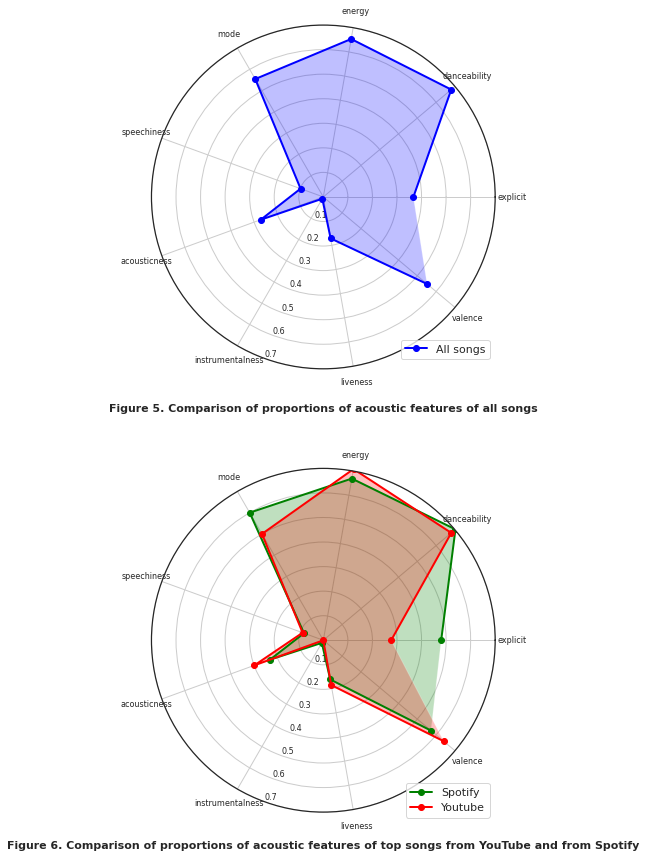

In [25]:
# ############################
# visualize acoustic features
# ############################

# Load data
features = ['explicit', 'danceability', 'energy',
            'mode', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence']
labels = list(features)[:]
stats_all = df_all[features].mean().tolist()

# Set the dimensions of the figure
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
fig = plt.figure(figsize=(20, 12))

# Plot the mean values of Spotify only
ax = fig.add_subplot(211, polar=True)
ax.plot(angles, stats_all, 'o-', linewidth=2,
        label="All songs", color='blue')
ax.fill(angles, stats_all, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles*180/np.pi, labels, fontsize=8)

# Set labels and hide texts
ax.set_rlabel_position(250)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
           ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7"], size=8)
plt.ylim(0, 0.7)
sns.set_theme(style="ticks")
ax.set_title('Figure 5. Comparison of proportions of acoustic features '
             'of all songs\n\n\n',
             fontdict={'fontsize': 11,
                       'fontweight': 'bold',
                       'verticalalignment': 'bottom',
                       'horizontalalignment': 'center'},
             va='bottom', y=-0.25)
plt.legend(loc='best', bbox_to_anchor=(1, 0.1))

# #######################
# comparison of features
# #######################

df_s = df_s[:100]

# Load data on acoustic features
stats_spotify = df_s[features].mean().tolist()
stats_youtube = df_yt[features].mean().tolist()

# Set the dimensions of the figure
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# Plot the mean values of Spotify only
ax1 = fig.add_subplot(212, polar=True)
ax1.plot(angles, stats_spotify, 'o-', linewidth=2,
         label="Spotify", color='green')
ax1.fill(angles, stats_spotify, alpha=0.25, facecolor='green')
ax1.set_thetagrids(angles*180/np.pi, labels, fontsize=8)

# Set labels and hide texts
ax1.set_rlabel_position(250)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
           ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7"], size=8)
plt.ylim(0, 0.7)
sns.set_theme(style="ticks")

# Plot the mean values of Youtube only
ax1.plot(angles, stats_youtube, 'o-', linewidth=2,
         label="Youtube", color='red')
ax1.fill(angles, stats_youtube, alpha=0.25, facecolor='red')
ax1.grid(True)

ax1.set_title('Figure 6. Comparison of proportions of acoustic features '
              'of top songs from YouTube and from Spotify',
              fontdict={'fontsize': 11,
                        'fontweight': 'bold',
                        'verticalalignment': 'baseline',
                        'horizontalalignment': 'center'},
              va='bottom', y=-0.13)
plt.legend(loc='best', bbox_to_anchor=(1, 0.1))
plt.tight_layout()
plt.show()

This in fact was observed upon further exploration of the individual features where most of the variables followed similar distribution patterns for both sets of songs, despite having only 38 songs present in both top charts.

Most of the chart-topping songs in both platforms are suitable for dancing, conveys positiveness, and are likewise perceived to have greater intensity and activity (see Figure 7).  Although not found to be predictors of hit songs without adding a “superstar” value, Interiano et. al ([2018](#interiano)) noted that top songs are generally happier, party-like and not relaxed.

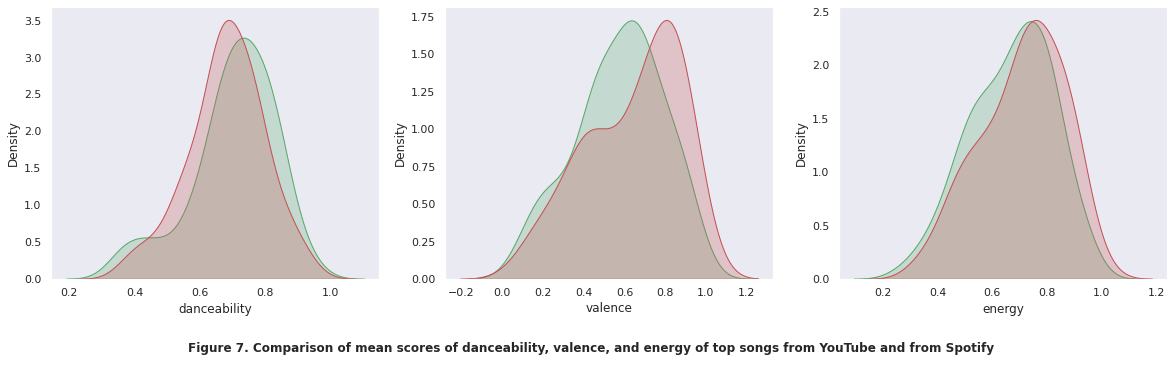

In [26]:
# Set plot size
plt.figure(figsize=(20, 5))

# Tagging the top 100 songs in Spotify
df_s_top100 = df_all[df_all['Spotify_Rank'] != 'Below Top 200']
df_s_top100["Spotify_Rank_INT"] = pd.to_numeric(
    df_s_top100["Spotify_Rank"])
df_s_top100 = df_s_top100[df_s_top100["Spotify_Rank_INT"] < 101]
df_s_top100["Top_Tag"] = "Spotify_Top"

# Tagging the top 100 songs in Youtube
df_y_top100 = df_all
df_y_top100['Rev YouTube Rank'] = df_y_top100[
    'YouTube Views'].rank(method='max')
df_y_top100 = df_y_top100[df_y_top100['Rev YouTube Rank'] < 101]
df_y_top100["Top_Tag"] = "Youtube_Top"

# Merging Spotify and Youtube
df_all_top100 = df_s_top100.append(df_y_top100)
sns.set_style("dark")

##############
# Danceability
##############

plt.subplot(1, 3, 1)
feature_concerned = 'danceability'
sns.set_style("dark")
sns.kdeplot(df_all_top100.loc[
    (df_all_top100['Top_Tag'] == 'Spotify_Top'), feature_concerned],
            color='g', shade=True, Label='Spotify')
sns.kdeplot(df_all_top100.loc[
    (df_all_top100['Top_Tag'] == 'Youtube_Top'), feature_concerned],
            color='r', shade=True, Label='Youtube')

#########
# valence
#########

plt.subplot(1, 3, 2)

feature_concerned = 'valence'
sns.set_style("dark")
sns.kdeplot(df_all_top100.loc[
    (df_all_top100['Top_Tag'] == 'Spotify_Top'), feature_concerned],
            color='g', shade=True, Label='Spotify')
sns.kdeplot(df_all_top100.loc[
    (df_all_top100['Top_Tag'] == 'Youtube_Top'), feature_concerned],
            color='r', shade=True, Label='Youtube')

#########
# Energy
#########

plt.subplot(1, 3, 3)
feature_concerned = 'energy'
sns.set_style("dark")
sns.kdeplot(df_all_top100.loc[
    (df_all_top100['Top_Tag'] == 'Spotify_Top'), feature_concerned],
            color='g', shade=True, Label='Spotify')
sns.kdeplot(df_all_top100.loc[
    (df_all_top100['Top_Tag'] == 'Youtube_Top'), feature_concerned],
            color='r', shade=True, Label='Youtube')

plt.suptitle('Figure 7. Comparison of mean scores of danceability, '
             'valence, and energy of top songs from YouTube and from '
             'Spotify\n', y=-0.05, fontweight='bold', size=12)
plt.show()

Correspondingly, chart-topping songs have vocal content, are not acoustic, and are not speech-like as illustrated in Figure 8.

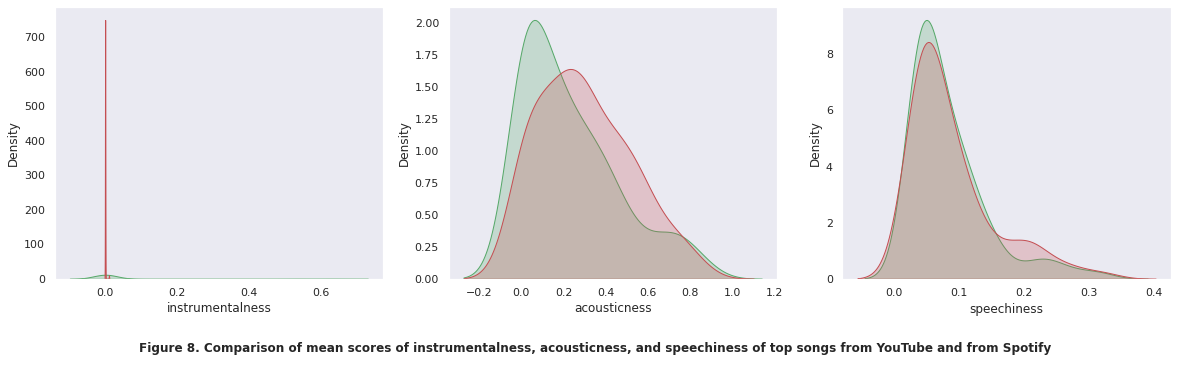

In [27]:
# Set plot size
plt.figure(figsize=(20, 5))

##################
# instrumentalness
##################

plt.subplot(1, 3, 1)

feature_concerned = 'instrumentalness'
sns.set_style("dark")
sns.kdeplot(df_all_top100.loc[
    (df_all_top100['Top_Tag'] == 'Spotify_Top'), feature_concerned],
            color='g', shade=True, Label='Spotify')
sns.kdeplot(df_all_top100.loc[
    (df_all_top100['Top_Tag'] == 'Youtube_Top'), feature_concerned],
            color='r', shade=True, Label='Youtube')

##############
# acousticness
##############

plt.subplot(1, 3, 2)

feature_concerned = 'acousticness'
sns.set_style("dark")
sns.kdeplot(df_all_top100.loc[
    (df_all_top100['Top_Tag'] == 'Spotify_Top'), feature_concerned],
            color='g', shade=True, Label='Spotify')
sns.kdeplot(df_all_top100.loc[
    (df_all_top100['Top_Tag'] == 'Youtube_Top'), feature_concerned],
            color='r', shade=True, Label='Youtube')

#############
# speechiness
#############

plt.subplot(1, 3, 3)

feature_concerned = 'speechiness'
sns.set_style("dark")
sns.kdeplot(df_all_top100.loc[
    (df_all_top100['Top_Tag'] == 'Spotify_Top'), feature_concerned],
            color='g', shade=True, Label='Spotify')
sns.kdeplot(df_all_top100.loc[
    (df_all_top100['Top_Tag'] == 'Youtube_Top'), feature_concerned],
            color='r', shade=True, Label='Youtube')

plt.suptitle('Figure 8. Comparison of mean scores of instrumentalness, '
             'acousticness, and speechiness of top songs from '
             'YouTube and from Spotify\n', y=-0.05, fontweight='bold',
             size=12)
plt.show()

Many of the chart-topping songs were not live performances (see Figure 9). Although caution must be made in this comparison as (1) songs reach YouTube’s top charts when combined views in all media using the official song are high; hence views for both live performances, if any, and their official music videos among others are considered; and (2) acoustic features of the chart-topping songs from YouTube were taken from Spotify data.

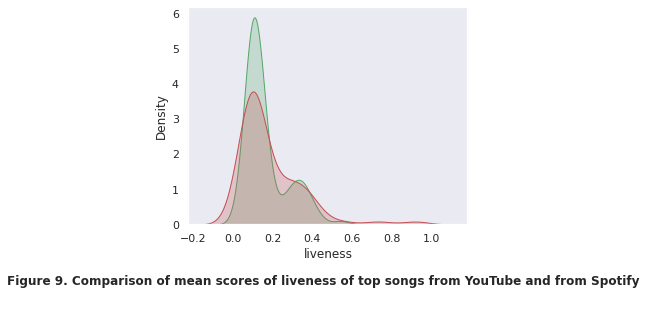

In [28]:
# Set plot size
plt.figure(figsize=(5, 4))

# ########
# liveness
# ########

feature_concerned = 'liveness'
sns.set_style("dark")
sns.kdeplot(df_all_top100.loc[
    (df_all_top100['Top_Tag'] == 'Spotify_Top'), feature_concerned],
            color='g', shade=True, Label='Spotify')
sns.kdeplot(df_all_top100.loc[
    (df_all_top100['Top_Tag'] == 'Youtube_Top'), feature_concerned],
            color='r', shade=True, Label='Youtube')

plt.suptitle('Figure 9. Comparison of mean scores of liveness '
             'of top songs from YouTube and from Spotify\n', y=-0.05,
             fontweight='bold', size=12)
plt.show()

As shown in Figure 10, most of the chart-topping songs in YouTube do not contain explicit content unlike in Spotify. Note however that Spotify tags a song as explicit only if rights-holders, meaning those who upload the songs, inform them that a song has explicit content ([Spotify, 2021](#spotify4)). On the other hand, chart-topping songs from both platforms usually are in major scales. Major scales are said to be associated with pop and jazz music and produce melodies to which humans are used to listening to ([Berklee Online, 2020](#berklee)). 


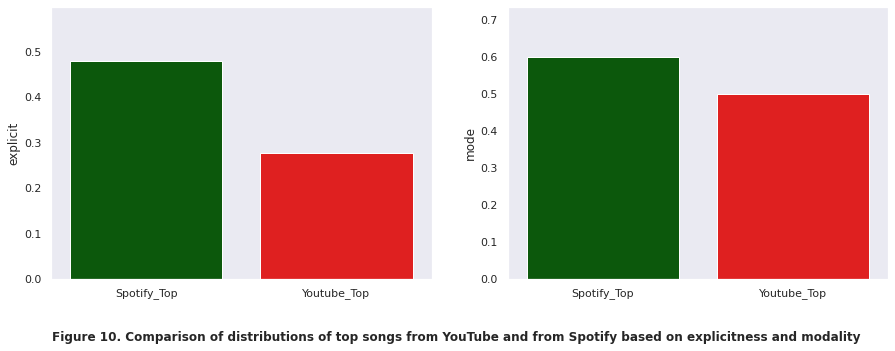

In [29]:
# Set plot size
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Figure 10. Comparison of distributions '
             'of top songs from YouTube and from Spotify '
             'based on explicitness and modality', y=-0.02, fontweight='bold',
             size=12)


# ########
# explicit
# ########

df_explicit = df_all_top100
df_explicit['Top_Tag'].replace({'Spotify_Top': 'Spotify',
                                'Youtube_Top': 'Youtube'}, inplace=False)
ax = sns.barplot(x="Top_Tag",
                 y="explicit",
                 data=df_explicit,
                 palette=['#006400', '#ff0000'],
                 errwidth=0,
                 ax=axes[0])
ax.set(xlabel='')

# ####
# mode
# ####

df_mode = df_all_top100
df_mode['Top_Tag'].replace({'Spotify_Top': 'Spotify',
                            'Youtube_Top': 'Youtube'}, inplace=False)
ax = sns.barplot(x="Top_Tag",
                 y="mode",
                 data=df_mode,
                 palette=['#006400', '#ff0000'],
                 errwidth=0,
                 ax=axes[1])
ax.set(xlabel='')
plt.show()

### Among the chart-topping songs, what is the relationship of a song’s popularity score to its artist/s’ popularity score?

A song’s popularity score is thought to be influenced by many factors, some of which include feature artists. Some songs are top billed by an already-famous artist, and invite their colleagues to join one or more songs as part of an EP or album.

**Does more feature artists impact song performance?** It appears not. More feature artists does not mean higher song popularity nor higher Spotify streams.

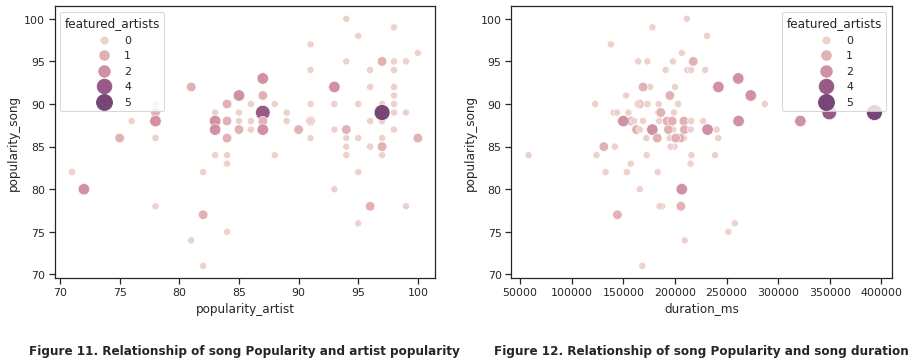

In [30]:
# Set plot size

# ############
# Figure 5.3.A
# ############

sns.set_theme(style="ticks")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# top 100
df_s_100 = df_s[:100]

# streams to int
df_s_100['Spotify_Streams'] = df_s_100['Spotify_Streams'].str.replace(',', '').astype(int)

# add featured_artists and topbill columns
df_s_100['featured_artists'] = df_s_100.Artist.str.count(',')
df_s_100['topbill'] = df_s_100.Artist.str.replace(r'(?<=),.*', '', regex=True)
df_s_100['topbill'] = df_s_100.topbill.str.replace(r'^\s+', '', regex=True)

# popularity score song / popularity score artist / # of featured artists
sns.set_theme(style="ticks")
sns.scatterplot(data=df_s_100,
                x='popularity_artist',
                y='popularity_song',
                hue='featured_artists',
                sizes=(50, 250),
                hue_norm=(0, 7),
                legend='full',
                size='featured_artists',
                ax=axes[0])
axes[0].set_title('Figure 11. Relationship of song Popularity '
                  'and artist popularity', y=-0.3, fontweight='bold',
                  size=12)

# ############
# Figure 5.3.B
# ############

# popularity score song / song duration / # of featured artists
sns.scatterplot(data=df_s_100,
                x='duration_ms',
                y='popularity_song',
                hue='featured_artists',
                sizes=(50, 250),
                hue_norm=(0, 7),
                legend='full',
                size='featured_artists',
                ax=axes[1])
axes[1].set_title('Figure 12. Relationship of song Popularity and song '
                  'duration', y=-0.3, fontweight='bold', size=12)
plt.show()

The number of featured artists does not appear to influence song popularity - they perform just as well as single-artist songs, as seen in Figure 11. This could be because songs are sung by artists that are already popular (all Top 100 singers have popularity scores >70).

In fact, even with featured artists, most songs remain under 20M songs as seen in Figure 12. In fact, songs that have >20M songs mostly have a single artist only.

**Who invites feature artists?** Artists that are less popular and have less followers are friendlier. They invite more featured artists even if they receive lower streams.

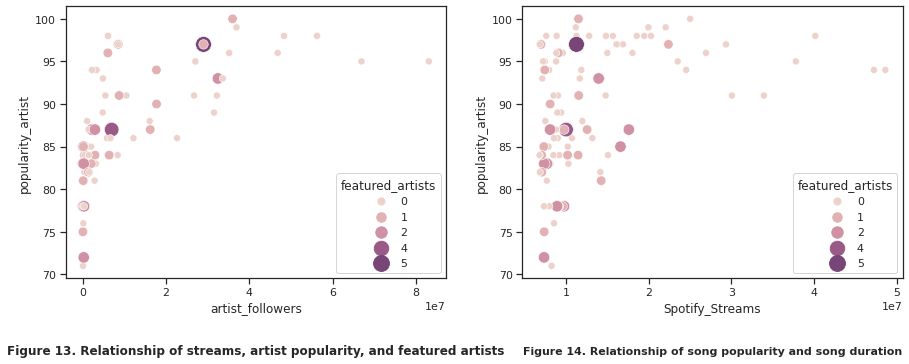

In [31]:
# ############
# Figure 5.3.A
# ############

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# number of followers / popularity score artist / # of featured artists
sns.scatterplot(data=df_s_100,
                x='artist_followers',
                y='popularity_artist',
                hue='featured_artists',
                sizes=(50, 250),
                hue_norm=(0, 7),
                legend='full',
                size='featured_artists',
                ax=axes[0])
sns.set_theme(style="ticks")
axes[0].set_title('Figure 13. Relationship of streams, artist popularity, and'
                  ' featured artists', y=-0.3, fontweight='bold', size=12)

# streams / popularity score artist / # of featured artists
sns.scatterplot(data=df_s_100,
                x='Spotify_Streams',
                y='popularity_artist',
                hue='featured_artists',
                sizes=(50, 250),
                hue_norm=(0, 7),
                legend='full',
                size='featured_artists',
                ax=axes[1])
sns.set_theme(style="ticks")
axes[1].set_title('Figure 14. Relationship of song popularity and song '
                  'duration', y=-0.3, fontweight='bold', size=11)
plt.show()

It appears that singers with less artist followers invite more featured artists (see Figure 13). It could possibly be a bid to acquire and reach out to fans of the featured artists, especially that, at least financially, the song revenue will be divided among them or through a similar but different agreement. More feature artists naturally translate to longer duration of songs for equal exposure (Figure 14).

### Among the chart-topping songs, what is the relationship of a song’s popularity score in Spotify to the number of views in YouTube?
Finally, we examined the relationship between YouTube views and its likes and dislikes. 

**Do songs need to cross a threshold to achieve higher rankings?** Maybe so. We plotted song popularity and their chart rankings in Spotify.

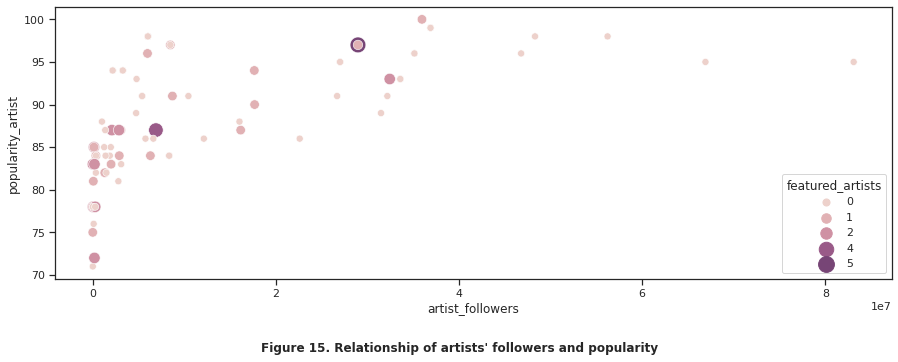

In [32]:
# number of followers / popularity score artist / # of featured artists
sns.scatterplot(data=df_s_100,
                x='artist_followers',
                y='popularity_artist',
                hue='featured_artists',
                sizes=(50, 250),
                hue_norm=(0, 7),
                legend='full',
                size='featured_artists')
sns.set_theme(style="ticks")
plt.gcf().set_size_inches(15, 5)
plt.suptitle("Figure 15. Relationship of artists' followers and popularity",
             y=-0.05, fontweight='bold', size=12)
plt.show()

It is difficult to predict rankings, but Spotify’s data may provide more guidance to artists and marketers. It appears in Figure 15 that most charted songs have song popularity scores more than 85. This could be an optimal target for artists and marketers to achieve. While Spotify is not transparent about its scoring, it is also fair to say that stream numbers alone cannot explain higher song popularity scores. To ensure rankings above the 20th place, they need to aim for song popularity scores >90.

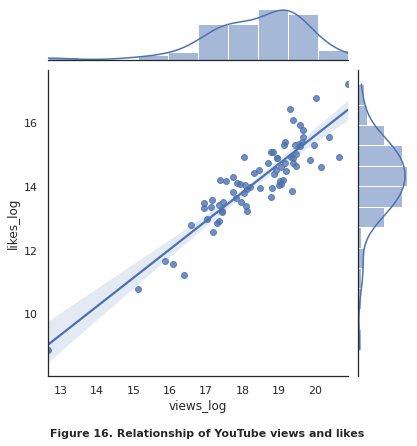

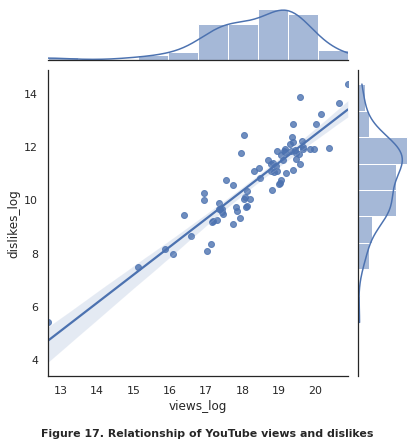

In [33]:
# Load data needed
df_all['views_log'] = np.log(df_all['views'])
df_all['likes_log'] = np.log(df_all['likes'])
df_all['dislikes_log'] = np.log(df_all['dislikes'])

# Plot views vs likes
sns.set_theme(style="white")
sns.jointplot(data=df_all, x="views_log", y="likes_log", kind='reg')
plt.suptitle('Figure 16. Relationship of YouTube views and likes',
             size=11, ha='center', va='bottom', y=-0.03, fontweight='bold')

# Plot views vs dislikes
sns.set_theme(style="white")
sns.jointplot(data=df_all, x="views_log", y="dislikes_log", kind='reg')
plt.suptitle('Figure 17. Relationship of YouTube views and dislikes',
             size=11, ha='center', va='bottom', y=-0.03, fontweight='bold')
plt.show()

Higher number of views appear to be associated with higher number of likes and dislikes in a YouTube video (Figures 16 and 17). 

### Among the chart-topping songs on Youtube and Spotify Charts, which are consistently on the top? What features are common to these?

We saw that based on the top 100 of the new rankings, 25 of YouTube’s top 100 songs do not belong to Spotify’s top 100 while 38 of Spotify’s top 100 songs do not belong to YouTube’s top 100. Given that, we explored yet again the difference between the songs in both groups (see Figure 18), and found out that songs in the top chart of Spotify tend to have higher scores in danceability and instrumentalness, songs only in top chart of YouTube had higher scores in energy, acousticness, liveness and valence. In terms of speechiness, scores are relatively the same for both platforms.

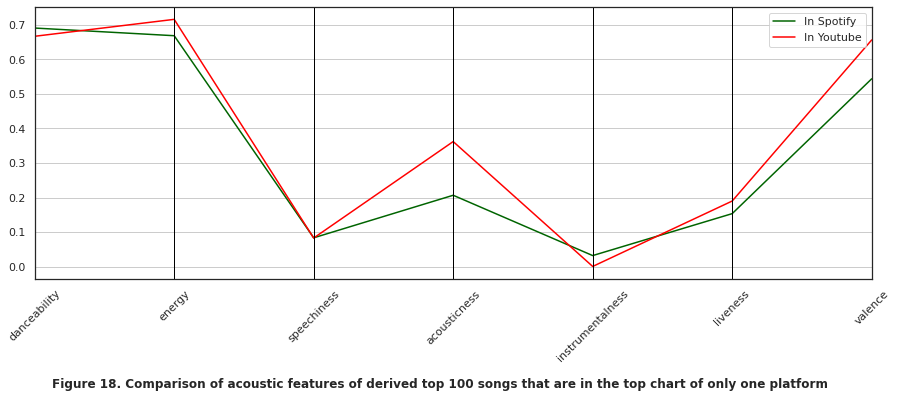

In [34]:
# delete unnecessary column
df_rank = df_rank.drop('index', axis=1)

# generate dataframe of top 100 songs based on relative weight
top100 = df_rank[:100]

# generate dataframe of top100 songs that are only in the top 100 of YouTube
in_yt = top100[top100['Spotify_Rank'] > 100]

# generate dataframe of top100 songs that are only in the top 100 of Spotify
in_s = top100[top100['YouTube Rank'] == 201]

# generate dataframe of songs
# that reached the top 100 charts of both platforms
in_both = top100[(top100['Spotify_Rank'] < 100) &
                 (top100['YouTube Rank'] < 100)]
in_both = in_both.reset_index()
in_both = in_both.drop('index', axis=1)

# generate dataframe of songs that reached
# the top 100 charts of both platforms
# but are not actually in the top 38 of the top100 songs
four = in_both[in_both['Relative Rank'] > 38]

# create tags
in_s["Tag"] = "In Spotify"
in_yt["Tag"] = "In Youtube"
in_both["Tag"] = "In Both"

# visualize the difference
top_charts = in_s.append(in_yt)
top_charts = top_charts.append(in_both)
top_charts_syt = in_s.append(in_yt)
instantaenous_features = ['Tag', 'danceability', 'energy',
                          'speechiness', 'acousticness',
                          'instrumentalness',
                          'liveness', 'valence']
top_charts_syt = top_charts_syt[instantaenous_features]
top_charts_syt_means = top_charts_syt.groupby('Tag').mean()
top_charts_syt_means = top_charts_syt_means.reset_index()
plt.figure(figsize=(15, 5))
pd.plotting.parallel_coordinates(top_charts_syt_means,
                                 'Tag', color=('#006400', '#ff0000'))
plt.xticks(rotation=45)
plt.suptitle('Figure 18. Comparison of acoustic features of'
             ' derived top 100 songs that are in the top '
             'chart of only one platform\n', y=-0.15,
             fontweight='bold', size=12)
plt.show()

In addition, popularity scores tend to be higher in Spotify than in YouTube (see Figure 21). This was probably the case because the popularity scores of the songs from YouTube were taken from Spotify data.

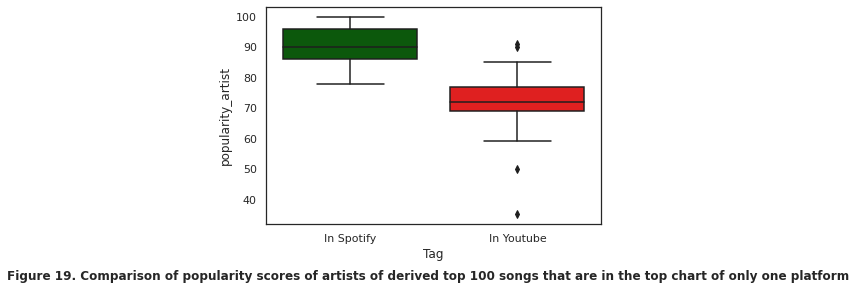

In [35]:
# Compare popularity scores
top_charts_syt_soc = in_s.append(in_yt)
soc_features = ['Title', 'Artist', 'popularity_artist',
                'artist_followers', 'Tag']
top_charts_syt_soc = top_charts_syt_soc[soc_features]
ax = sns.boxplot(x="Tag", y="popularity_artist",
                 data=top_charts_syt_soc, palette=['#006400', '#ff0000'])
plt.suptitle('Figure 19. Comparison of popularity scores of artists of'
             ' derived top 100 songs that are in the top '
             'chart of only one platform\n',
             size=12, ha='center', va='bottom', y=-0.13, fontweight='bold')
plt.show()

Another interesting finding was that only 37 songs belong to the top 100 charts of both platforms; and 89.19% of the 37 songs belongs to the top 37 songs of the new rankings.

Interestingly, the songs ranked  46, 54, 55, and 67, though with lower rankings than the 34, made it to both top charts. All had a `danceability` score of more than 0.7 and `energy` of 0.77, and are written with melodies in major scales - consistent with the patterns we observed generally. *Loco* and *Sobrio* are Latin songs while *Positions* is a pop song - both of which belong to the top genres. *Dinero*, which is a spanish term meaning “money”, apparently went viral in TikTok dance videos ([Rouhani, 2021](#rouhani)) which probably contributed to their inclusion in the top charts of both platforms.

Nonetheless, in both music streaming platforms, it can be observed that views or streams appeared to be correlated as can be expected since both are on the top charts (see Figure 20).

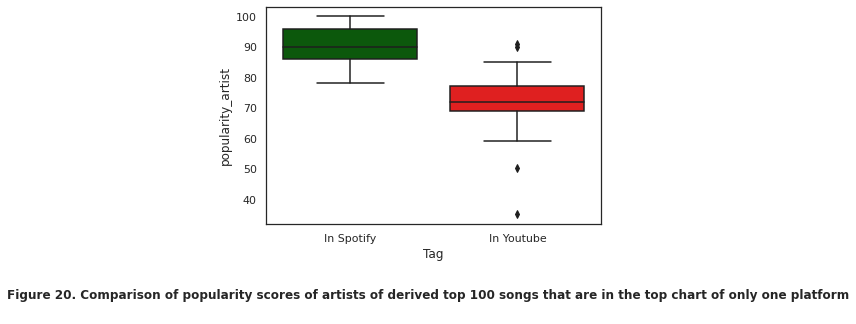

In [36]:
# compare popularity scores
top_charts_syt_soc = in_s.append(in_yt)
soc_features = ['Title', 'Artist', 'popularity_artist',
                'artist_followers', 'Tag']
top_charts_syt_soc = top_charts_syt_soc[soc_features]
ax = sns.boxplot(x="Tag", y="popularity_artist",
                 data=top_charts_syt_soc, palette=['#006400', '#ff0000'])
plt.suptitle('Figure 20. Comparison of popularity scores of artists of'
             ' derived top 100 songs that are in the top '
             'chart of only one platform\n', y=-0.1, fontweight='bold',
             size=12)
plt.show()

Additionally, it can also be said that all of these songs had popularity scores of more than 85 (see Figure 21).

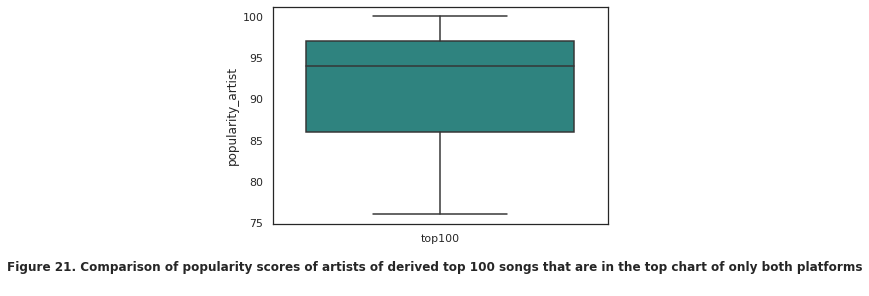

In [37]:
# Create a plot on popularity artist
in_both_tag = in_both
in_both_tag[' '] = 'top100'
sns.boxplot(x=" ", y="popularity_artist", data=in_both_tag, palette='viridis')
plt.suptitle('Figure 21. Comparison of popularity scores of artists of'
             ' derived top 100 songs that are in the top '
             'chart of only both platforms\n',
             ha='center', va='bottom', y=-0.1, fontweight='bold', size=12)
plt.show()

Finally, we explored what features are common in both YouTube’s and Spotify’s top hits. Majority of the songs generally follow the same patterns, except for explicit content which was present in about half (see Figure 22). 

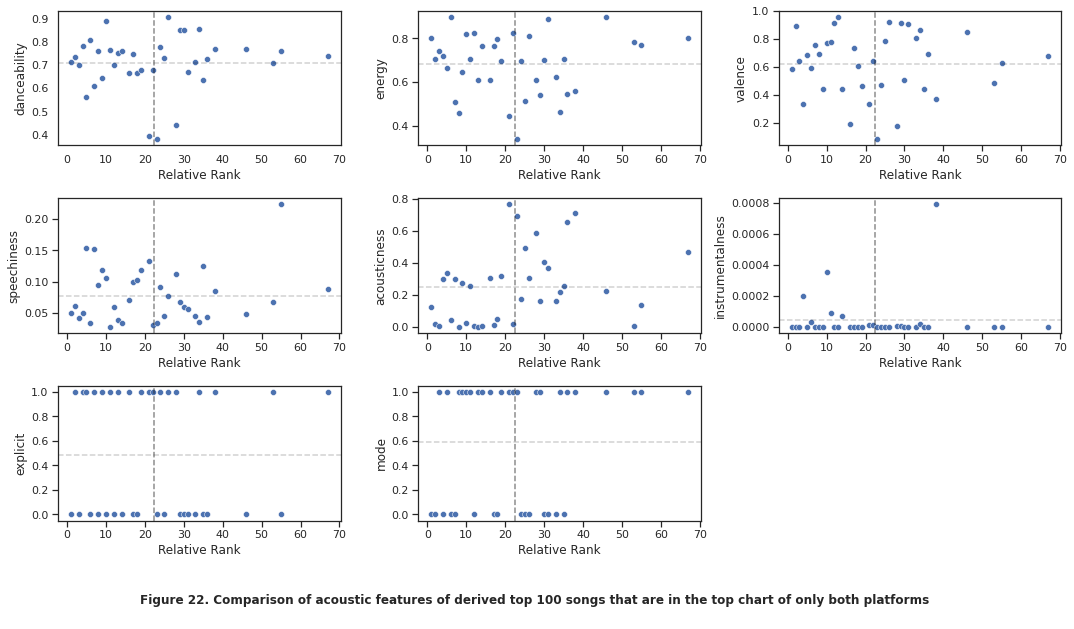

In [38]:
###################################################################
# Plot the acoustic features of top songs common in both platforms
###################################################################

instantaneous = ['danceability', 'energy', 'valence',
                 'speechiness', 'acousticness',  'instrumentalness',
                 'explicit', 'mode']

# set plot size
plt.figure(figsize=(15, 8))

################################
# Danceability, Energy, Valence
################################
for j in range(1, 9):
    plt.subplot(3, 3, j)
    sns.set_theme(style="ticks")
    x = instantaneous[j-1]
    sns.scatterplot(x=in_both["Relative Rank"],
                    y=in_both[x], data=in_both, palette="viridis")
    sns.set_theme(style="ticks")
    sns.color_palette("viridis")
    plt.axhline(in_both[x].mean(), color='k', linestyle='--', alpha=0.2)
    plt.axvline(in_both['Relative Rank'].mean(),
                color='k', linestyle='--', alpha=0.5)

#############################
# Fix distance and show plot
#############################
plt.tight_layout()
plt.suptitle('Figure 22. Comparison of acoustic features of'
             ' derived top 100 songs that are in the top '
             'chart of only both platforms\n',
             size=12, ha='center', va='bottom', y=-0.09, fontweight='bold')
plt.show()

It can therefore be said that songs that reach both YouTube’s and Spotify’s charts are suitable for dancing, conveys positiveness, are perceived to have greater intensity and activity, not acoustic, does not contain spoken words, not recorded live, and have melody that are in major scale.

## Summary of Results and Conclusions

In this report, we provide evidence that adds to existing literature on the common features between top-charted songs on Spotify and YouTube. We discovered that:

*Instantaneous*
- **Acoustic features among top songs from YouTube and Spotify received the highest scores on danceability, energy and valence, close to 0 scores on speechiness and instrumentalities.** This is consistent with existing literature. This was observed even if only about 20% of the songs are present in both Spotify and YouTube charts.
- **Most acoustic features are common in both YouTube and Spotify’s top hits, except for explicit content which was present in about half.** Top hits are often suitable for dancing, conveys positiveness, and are perceived to have greater intensity and activity.
- **Microgenres are increasingly becoming pervasive.** As an internal tool this is helpful for them in creating machine-generated playlists. This may also indicate that labels are already catering to specific, hyper targeted markets. This allows artists to ensure their songs are being served to very specific groups of listeners (e.g. `Australian pop` and `Pop`, `European Rock` and `Rock`, among others).

*Social*
- **More featured artists do not translate to higher streams nor a higher popularity score.** In fact, it is the less popular artists, in terms of score and the number of followers, who invite feature artists alongside longer track length.
- **Having a popularity score of >90 may increase chances of being at the Top 20 charts.** Because popularity scores rely on many different factors aside from streams, this may help artists and labels to set targets on these.

*Dynamic*
- **Top charted songs were produced by only four major labels, three of which were all based in the United States.** Popularity in the context of Spotify and YouTube charts appear to rely heavily on reputation and funding of major labels and artists.
- **In terms of markets served, the limits of Spotify are the start of where YouTube thrives.** Particularly in the Indian market, Spotify was a latecomer. Alphabet, YouTube’s parent company, has heavily invested in the region, and listening behavior reflected strongly on its global charts.

In conclusion, popularity features of top-charting songs in both Spotify and YouTube have a lot in common, especially in acoustic features. However, acoustic features alone do not appear to explain popularity. Traditional record labels still dominate the charts, but it is the platforms who enable their ability to reach hyper targeted markets (for example, through microgenres).

In this report, we have successfully described the shared features of top-charting songs in both Spotify and YouTube. Against our definition of popularity - defined as having instantaneous, dynamic, and social aspects - we have surfaced insights on both artist and listener activities in two different platforms through a relative ranking that we have designed in order to normalize and connect both rankings. Evaluation of these popularity features may be useful to replicate in narrower contexts, and can be used as preparatory work for other machine learning efforts in predicting popularity of songs in these two platforms.

## Recommendations
We recommend the following for both researchers and song artists and their labels:
1. **Interoperability on metrics**. A specific challenge that we encountered was ensuring compatibility between the number of views, popularity scores, and acoustic features. Interoperability will enable industry-wide metrics that can be adopted globally. This will benefit artists, marketers, and researchers to better track and understand the performance of songs and their popularity. 
2. **Transparency on rankings**. Specifically, Spotify provides popularity scores that rank how artists fare against other artists on the platform. This is one of Spotify’s internal indicators on how it places artists’ songs in its charts and in its featured playlists.
3. **Longer-term observation of data**. Recently, YouTube has received further resources from its parent company, Alphabet, in order to push YouTube Music alongside its traditional video platform. It is worth exploring how this can destabilize Spotify’s status as the leading provider of music to several markets worldwide.
4. **Explore further the intersection of music and machine learning efforts**. This study can serve as basis for other efforts in using machine learning to predict popularity or listener behavior. However, popularity is not the only use case for music and machine learning. This report can also serve as basis for predicting anxiety or improving music therapy for mental health and wellbeing towards medical value.

## References

<a id='al-beitawi'>Al-Beitawi, Z., Salehan, M., & Zhang, S.</a> (2020). What Makes a Song Trend? Cluster Analysis of Musical Attributes for Spotify Top Trending Songs. *Journal of marketing development and competitiveness*, 14(3), 79-91.

<a id='araujo'>Araujo, C. S., Cristo, M., & Giusti, R.</a> (2019, September). Predicting music popularity on streaming platforms. In *Anais do XVII simpósio Brasileiro de computação musical* (pp. 141-148). SBC.

<a id='berklee'>Berklee Online.</a> (2020). Music Modes: Major and Minor Modal Scales in Music Theory. Retrieved from https://online.berklee.edu/takenote/music-modes-major-and-minor/

<a id='cayari'>Cayari, C.</a> (2011). The YouTube Effect: How YouTube Has Provided New Ways to Consume, Create, and Share Music. *International journal of education & the arts*, 12(6), n6.

<a id='dhar'>Dhar, V., & Chang, E. A.</a> (2009). Does chatter matter? The impact of user-generated content on music sales. *Journal of interactive marketing*, 23(4), 300-307.

<a id='dolata'>Dolata, U.</a> (2020). The digital transformation of the music industry. The second decade: From download to streaming (No. 2020-04). SOI Discussion Paper.

<a id='georgieva'>Georgieva, E., Suta, M., & Burton, N.</a> (2018). Hitpredict: Predicting Hit Songs Using Spotify Data Stanford Computer Science 229: Machine Learning. In Center for Computer Research in Music and Acoustics, Stanford University, USA, Department of Civil and Environmental Engineering.

<a id='google'>Google Research.</a> (2021). Music genre. Retrieved from https://research.google.com/audioset/ontology/music_genre_1.html

<a id='hujran'>Hujran, O., Alikaj, A., Durrani, U. K., & Al-Dmour, N.</a> (2020, January). Big Data and its Effect on the Music Industry. In *Proceedings of the 3rd International Conference on Software Engineering and Information Management* (pp. 5-9).

<a id='interiano'>Interiano, M., Kazemi, K., Wang, L., Yang, J., Yu, Z., & Komarova, N. L.</a> (2018). Musical trends and predictability of success in contemporary songs in and out of the top charts. *Royal Society Open Science*, 5(5), 171274.

<a id='kim'>Kim, S. T., & Oh, J. H.</a> (2021). Music intelligence: Granular data and prediction of top ten hit songs. *Decision support systems*, 145, 113535.

<a id='liikkanen'>Liikkanen, L. A., & Salovaara, A.</a> (2015). Music on YouTube: User engagement with traditional, user-appropriated and derivative videos. *Computers in human behavior*, 50, 108-124.

<a id='ni'>Ni, Y., Santos-Rodriguez, R., Mcvicar, M., & De Bie, T.</a> (2011). Hit song science once again a science. In *4th International workshop on machine learning and music*.

<a id='nijkamp'>Nijkamp, R.</a> (2018). Prediction of product success: explaining song popularity by audio features from Spotify data (Bachelor's thesis, University of Twente).

<a id='pachetroy'>Pachet, F., & Roy, P.</a> (2008). Hit Song Science Is Not Yet a Science. In *ISMIR* (pp. 355-360).

<a id='pachetsony'>Pachet, F., & Sony, C. S. L.</a> (2012). Hit song science. Music data mining, 305-326.

<a id='park'>Park, J., Park, J., & Park, J.</a> (2018). The effects of user engagements for user and company generated videos on music sales: Empirical evidence from YouTube. *Frontiers in psychology*, 9, 1880.

<a id='reiman'>Reiman, M., & Örnell, P.</a> (2018). Predicting hit songs with machine learning.

<a id='ren'>Ren, J., Shen, J., & Kauffman, R. J.</a> (2016). What makes a music track popular in online social networks?. In *Proceedings of the 25th International conference companion on world wide web* (pp. 95-96).

<a id='ren'>Rouhani, N.</a> (2021). 'An artist with nine lives': Trinidad Cardona was a food delivery driver when his 2018 single went viral on TikTok. Billboard. Retrieved from https://www.billboard.com/articles/columns/hip-hop/9595728/trinidad-cardona-2018-single-viral-tiktok/

<a id='salganik'>Salganik, M. J., Dodds, P. S., & Watts, D. J.</a> (2006). Experimental study of inequality and unpredictability in an artificial cultural market. *Science*, 311(5762), 854-856.

<a id='Silver'>Silver, D., Lee, M., & Childress, C. C. (2016).</a> Genre complexes in popular music. PloS one, 11(5), e0155471.

<a id='spotify1'>Spotify.</a> (2021). Company info. Retrieved from https://newsroom.spotify.com/company-info/

<a id='spotify2'>Spotify.</a> (2021). Top 200 charts. Retrieved from https://spotifycharts.com/regional

<a id='spotify3'>Spotify.</a> (2021). Web API v1 reference. Retrieved from https://developer.spotify.com/documentation/web-api/reference/

<a id='spotify4'>Spotify.</a> (2021). Explicit content. Retrieved from https://support.spotify.com/us/article/explicit-content/

<a id='statista'>Statista.</a> (2021). YouTube - statistics and facts. Retrieved from https://www.statista.com/topics/2019/youtube/

<a id='suh'>Suh, B. J.</a> (2019). International Music Preferences: An Analysis of the Determinants of Song Popularity on Spotify for the US, Norway, Taiwan, Ecuador, and Costa Rica. (Bachelor's thesis, Claremont Colleges).

<a id='way'>Way, S. F., Garcia-Gathright, J., & Cramer, H.</a> (2020, May). Local trends in global music streaming. In *Proceedings of the International AAAI conference on web and social media* (Vol. 14, pp. 705-714).

<a id='youtube1'>YouTube.</a> (2021). Data API v3. Retrieved from https://developers.google.com/youtube/v3/docs

<a id='youtube2'>YouTube.</a> (2021). Music charts and insights. Retrieved from https://charts.youtube.com/?hl=en-GB

<a id='youtube3'>YouTube.</a> (2021). Understand your performance as an artist on YouTube. Retrieved from https://support.google.com/youtube/answer/9419340?hl=en

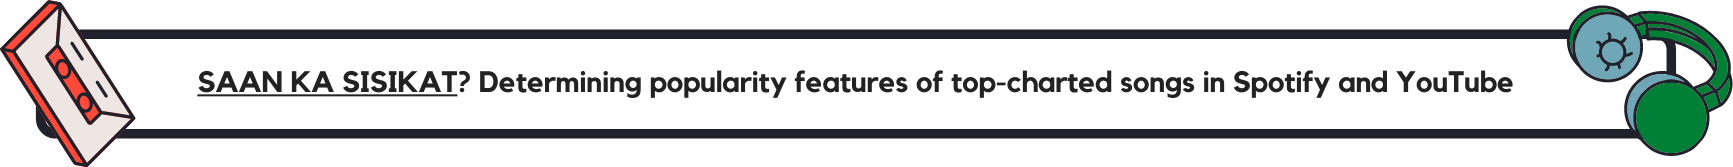